# **Project Name**    - NYC Taxi Trip Time Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

**Objective**: To develop a machine learning model that predicts the duration of taxi trips in New York City.

Key Steps and Components:

1. Data Collection:
Gather historical NYC taxi trip data, including features like pickup/dropoff locations, timestamps, and trip durations.

2. Data Preprocessing:Clean the data, handle missing values, and remove outliers.
Convert relevant features into appropriate formats.
Extract additional features such as day of the week and hour of the day.
Normalize or scale numerical features.
3. Exploratory Data Analysis (EDA):Visualize data distributions and summary statistics.
Identify patterns and correlations in the data.
4. Feature Engineering:Create new features that might influence trip duration.
Encode categorical variables.
Prepare the data for modeling.
5. Data Splitting:Split the dataset into training and testing sets for model evaluation.
6. Model Selection:Choose regression models (e.g., linear regression, decision trees, random forests, gradient boosting, or neural networks) for prediction.
7. Model Training:Train the selected model on the training data.
8. Model Evaluation:Evaluate the model's performance using regression metrics like MAE, MSE, and RMSE.

9. Hyperparameter Tuning:Fine-tune model hyperparameters to improve predictive accuracy.
10. Feature Selection (Optional):Optimize feature selection to simplify the model.
11. Model Validation:Validate the model's performance on the testing set.
12. Model Interpretation:Understand the model's coefficients or feature importances to explain what contributes to trip duration.
13. Deployment (if applicable):Deploy the model for real-time predictions.
14. Monitoring and Maintenance:Continuously monitor the model's performance and make updates as necessary.
15. Documentation and Reporting:Document the entire project, from data sources to model results.Share findings and insights with stakeholders.

16. Visualization:
Create visualizations or dashboards to communicate predictions and insights effectively.

Conclusion: The NYC Taxi Trip Time Prediction project aims to harness machine learning to provide valuable insights and predictions for taxi services in New York City, offering a practical solution to a real-world problem.

# **GitHub Link -**

# **Problem Statement**


New York is riddled with one-ways, small side streets, and an almost incalculable number of pedestrians at any given point in time. Not to mention the number of cars, motorcycles, and bicycles clogging up the roads. Combine this with a mad rush to get from point A to point B, and you'll find yourself late for whatever you need to be on time for.

The solution to getting from A to B when living in a city like New York (without losing your mind) is easy: take a taxi, Uber, Lyft, etc. You don't need to stress about the traffic or pedestrians, and you have a moment to do something else, like catching up on emails. Although this sounds simple enough, it doesn't guarantee you'll reach your destination on time. So, you need to have your driver take the shortest trip possible. By 'shortest,' we mean the shortest in terms of time. If route A is X kilometers longer but gets you there Y minutes faster than route B, it's a better choice.

To determine which route is the best one to take, we need to predict how long the trip will last when taking a specific route. Therefore, the goal of this playground competition is to predict the duration of each trip in the test data set, given the start and end coordinates.

Accurate predictions of NYC taxi trip times can have a significant impact on various stakeholders.

1. Taxi Services: Improved scheduling and routing can lead to cost savings and better customer service.

2. Ride-Sharing Platforms: Enhanced user experiences and optimized route planning can attract more users.

3. Passengers: Knowing the estimated trip duration in advance can help passengers plan their journeys more effectively.

4. City Planning: Data insights can inform traffic management and infrastructure development.

Overall, the NYC Taxi Trip Time Prediction project seeks to leverage machine learning to address a real-world transportation challenge, making taxi services in NYC more efficient and user-friendly.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install folium
!pip install haversine
!pip install xgboost

In [ ]:
# Importing the libraries
import folium
import numpy as np
import pandas as pd
import math
from haversine import haversine
import xgboost as xgb

from math import radians, cos, sin, asin, sqrt
import sklearn
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from geopy.distance import great_circle
from geopy.geocoders import Nominatim

### Dataset Loading

In [ ]:
#This code is for mounting Google Drive in a Google Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data from a csv file.
path ="/content/drive/MyDrive/Data science/Capstone Project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv"
df =  pd.read_csv(path)


The above code is used to import data from a CSV file into a Pandas DataFrame. Here's a breakdown of the code:

1. path = "/content/drive/MyDrive/Data science/Capstone Project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv": This line defines a variable path and assigns it a string value. The string represents the file path to the CSV file you want to import. The file is located in a Google Drive directory.

2. df = pd.read_csv(path): This line uses the Pandas library to read the data from the CSV file specified by the path variable. Here's what it does:

> pd.read_csv() is a Pandas function that reads data from a CSV file and loads it into a DataFrame. The function takes the file path as an argument.
The resulting DataFrame is assigned to the variable df, which allows us to work with the data in your Colab notebook.

### Dataset First View

In [ ]:
#This code snippet involves using Pandas to set a display option for the formatting of floating-point numbers in a Pandas DataFrame and then displaying the first few rows of the DataFrame using the head() method.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


### Dataset Rows & Columns count

In [ ]:
df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# checking data-types of variables to identify the numerical and categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


#### Duplicate Values

In [ ]:
#Check for duplicated values
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Variables Description

Feature details:
1. id - a unique identifier for each trip

2. vendor_id - a code indicating the provider associated with the trip record

3. pickup_datetime - date and time when the meter was engaged

4. dropoff_datetime - date and time when the meter was disengaged

5. passenger_count - the number of passengers in the vehicle (driver entered value)

6. pickup_longitude - the longitude where the meter was engaged

7. pickup_latitude - the latitude where the meter was engaged

8. dropoff_longitude - the longitude where the meter was disengaged

9. dropoff_latitude - the latitude where the meter was disengaged

10. store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Categorizing the features :

Let's divide features into categories:

1. Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

2. Time related: pickup_datetime, dropoff_datetime

3. Identifier: id(not useful for analysis)

4. Others: vendor_id, passenger_count, store_and_fwd_flag

Label details:
>trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


So, We have three categorical variables are:-
1. vendor_id
2. passenger_count
3. store_and_fwd_flag

In [ ]:
categorical_variables=['vendor_id','passenger_count','store_and_fwd_flag']

### What did you know about your dataset?

There are approx 1.5 million records in our dataset.There is no NaN/NULL and duplicate record in the dataset, So we dont have to impute any record.

A minimum trip duration of 1 second and a maximum of 3,526,282 seconds (roughly 980 hours) are observed. It's highly improbable for someone to take a trip lasting that long since the resulting bill would be astronomical. Similarly, a 1-second trip would not get you anywhere. Therefore, it is evident that there are outliers that require our attention.

A minimum passenger count is 0 and maximum count is 9. No taxi can be with 0 passenger. This maybe outlier. We will remove these entries.

An interesting variable to explore is 'passenger_count.' An increased number of passengers could lead to multiple scenarios. It might result in more stops along the way, extending the time from point A to point B. However, please note that we don't have information on the number of passengers at the start and end of the trip. If we had this information, we could split the data between drops into separate entries, with the final entry in a series of rows ending with 0 passengers. From a purely physical perspective, more passengers mean a heavier vehicle, which might lead to slightly slower movement. Although I believe the impact of this is negligible.

My initial thoughts on this matter are that we should extract the hour of the day, day of the week, and day of the month from the 'pickup_datetime' field. This seems logical because peak-hour traffic and the difference between weekends and weekdays could significantly affect travel times. Additionally, there might be seasonality in travel times between different months of the year. For example, New York's winter months could impact travel time; wet or icy roads tend to result in slower driving speeds, leading to longer travel times regardless of the chosen route.



The same goes for 'vendor' and 'store_and_fwd_flag.' It's possible that we could find differences between vendor 1 and vendor 2, with one of them potentially affecting 'shortest route information' due to less efficient route planning. However, I find this possibility highly unlikely. Still, it's worth investigating and definitively ruling it out. As for 'store_and_fwd_flag,' not having a connection to the server for a particular route could indicate several things. If we discover a strong correlation between slow trip times and server disconnects, we could use it as an additional feature in the training model to predict the time a particular route might take.

Ultimately, the 'latitude' and 'longitude' variables are where I believe the most value lies. We can cluster them into 'neighborhoods' and calculate the distance and directions between coordinates.

## 2. ***Data Wrangling***

### Data Wrangling Code

#### Creating some new columns

In [ ]:
# Assuming 'Date' is in a string format like 'YYYY-MM-DD'
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

The above code is used to convert two columns of a Pandas DataFrame, 'pickup_datetime' and 'dropoff_datetime', from strings to datetime objects using the pd.to_datetime()

The primary purpose of converting these columns to datetime objects is to enable the analysis and manipulation of date and time information in a more convenient and standardized way. Once the conversion is done, we can perform various operations on the datetime objects, such as extracting components like year, month, day, hour, minute, etc., or calculating time intervals between 'pickup_datetime' and 'dropoff_datetime'. This is particularly useful in time-series data analysis and various time-related calculations.

In [ ]:
#creating features from the date variables
df['Pickup_Year'] = df['pickup_datetime'].dt.year
df['Pickup_Month'] = df['pickup_datetime'].dt.month
df['Pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['time_only'] = df['pickup_datetime'].dt.hour

In [ ]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

The above code defines a function haversine_distance that calculates the Haversine distance between two pairs of latitude and longitude coordinates. The Haversine formula is used to compute the great-circle distance between two points on the Earth's surface, given their latitudes and longitudes. The result is returned in kilometers (km).

The calculated Haversine distance h is returned as the result of the function, representing the distance in kilometers between the two points specified by their latitude and longitude coordinates.

In [ ]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

The above code defines a function dummy_manhattan_distance that calculates a simplified Manhattan distance between two pairs of latitude and longitude coordinates. This simplified calculation approximates the Manhattan distance by breaking down the distance into horizontal and vertical components. The result is returned in kilometers (km).

The code returns the sum of a and b, effectively representing the Manhattan distance approximation in kilometers between the two points specified by their latitude and longitude coordinates. This approximation is useful for certain scenarios where a quick, simplified distance estimate is sufficient. However, it's important to note that this calculation is not the true Manhattan distance used in formal geometry, which involves only horizontal and vertical movements. This approximation takes into account the Earth's curvature in the distance calculation.

In [ ]:
def bearing_array(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

The above code defines a function bearing_array that calculates the initial bearing (direction) in degrees between two pairs of latitude and longitude coordinates. The initial bearing represents the compass direction from the first point to the second point. This calculation takes into account the curvature of the Earth.

The calculated initial bearing in degrees is returned as the result of the function. It represents the compass direction (e.g., north, south, east, west) in degrees in which you would need to travel from the first point to reach the second point.

In [ ]:
df.loc[:, 'distance_haversine'] = haversine_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)

The above code is used to calculate the Haversine distances between pairs of latitude and longitude coordinates for each row in a Pandas DataFrame and then add these distances as a new column in the DataFrame.

The purpose of this code is to add a new column to the DataFrame that contains the Haversine distances, which can be useful for various geospatial analyses, distance-based calculations, and visualization.

In [ ]:
df.loc[:, 'direction'] = bearing_array(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)

The above code is used to calculate the initial bearing (direction) in degrees between pairs of latitude and longitude coordinates for each row in a Pandas DataFrame and then add these bearing values as a new column in the DataFrame.

In [ ]:
df.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)

The above code is used to calculate the Manhattan distances (also known as the "taxicab distance") between pairs of latitude and longitude coordinates for each row in a Pandas DataFrame and then add these distance values as a new column in the DataFrame.

In [ ]:
df['trip_in_minutes'] = df['trip_duration']/60

The above code calculates the 'trip_in_minutes' column in a DataFrame (df_copy) based on the 'trip_duration' column.
As a result, the 'trip_in_minutes' column now contains the duration of each taxi trip in minutes, making it more user-friendly for analysis or presentation in minutes rather than seconds.

In [ ]:
df.loc[:, 'avg_speed_h'] = 1000 * df['distance_haversine'] / df['trip_duration']

The provided code calculates the average speed in meters per second (m/s) for each row in a Pandas DataFrame and adds these calculated speed values as a new column named 'avg_speed_h' in the DataFrame.

#### Lets create the "Neighborhoods"

In [ ]:
coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,df[['dropoff_latitude', 'dropoff_longitude']].values))

The Above code is for data preprocessing, specifically for combining the latitude and longitude coordinates from two columns in a Pandas DataFrame into a NumPy array. Here's a breakdown of the code:
1. The .values attribute is applied to each of these selections, converting them into NumPy arrays. This results in two NumPy arrays, one for pickup coordinates and the other for dropoff coordinates.

2. np.vstack is then used to vertically stack these two arrays, combining them into a single NumPy array. The resulting array will have two columns, where the first column contains the latitude values (pickup and dropoff), and the second column contains the longitude values (pickup and dropoff).

The purpose of this code is to create a single NumPy array that contains both pickup and dropoff coordinates, which can be useful for various geospatial and data analysis tasks. It's common to combine related columns in this way to simplify data handling and processing when dealing with geographical data.






In [ ]:
coords.shape

(2917288, 2)

In [ ]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=50, batch_size=10000).fit(coords[sample_ind])

The above code is for performing k-means clustering on a sample of coordinates.

The purpose of this code is to perform k-means clustering on a large dataset by first randomly selecting a sample of 500,000 coordinates and then applying the clustering algorithm to find 100 clusters within this sample. K-means clustering can be useful for various tasks, such as spatial analysis, recommendation systems, and data segmentation, where grouping similar data points together is beneficial.

In [ ]:
df.loc[:, 'pickup_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
df.loc[:, 'dropoff_cluster'] = kmeans.predict(df[['dropoff_latitude', 'dropoff_longitude']])

The above code is used to assign cluster labels to latitude and longitude coordinates in a Pandas DataFrame using the k-means clustering model previously created.

The overall purpose of this code is to assign cluster labels to the pickup and dropoff coordinates based on their similarity to the centroids of clusters determined by the k-means clustering model. This can be useful for segmenting and analyzing taxi trip data based on the locations where trips originate (pickup) and end (dropoff). Cluster labels provide a way to group similar pickup and dropoff locations, which can be valuable for various geospatial analyses and insights.

####Create a copy of data set

In [ ]:
#creating a copy of df
df_copy=df.copy()

#### Defining List of Categorical columns and finding unique values

In [ ]:
# Check Unique Values for each variable.
for i in df_copy.columns.tolist():
  print(i)
  print("Unique values are",df_copy[i].nunique())
  print(df_copy[i].sort_values().unique())
  print(' ')

id
Unique values are 1458644
['id0000001' 'id0000003' 'id0000005' ... 'id3999998' 'id3999999'
 'id4000000']
 
vendor_id
Unique values are 2
[1 2]
 
pickup_datetime
Unique values are 1380222
['2016-01-01T00:00:17.000000000' '2016-01-01T00:00:53.000000000'
 '2016-01-01T00:01:01.000000000' ... '2016-06-30T23:59:10.000000000'
 '2016-06-30T23:59:37.000000000' '2016-06-30T23:59:39.000000000']
 
dropoff_datetime
Unique values are 1380377
['2016-01-01T00:03:31.000000000' '2016-01-01T00:05:54.000000000'
 '2016-01-01T00:07:13.000000000' ... '2016-07-01T20:17:00.000000000'
 '2016-07-01T22:10:26.000000000' '2016-07-01T23:02:03.000000000']
 
passenger_count
Unique values are 10
[0 1 2 3 4 5 6 7 8 9]
 
pickup_longitude
Unique values are 23047
[-121.93334198 -121.93323517  -79.56973267 ...  -65.89738464  -65.84838867
  -61.33552933]
 
pickup_latitude
Unique values are 45245
[34.35969543 34.7122345  35.08153152 ... 43.91176224 44.37194443
 51.88108444]
 
dropoff_longitude
Unique values are 33821
[-121

In [ ]:
categorical_variables=['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'Pickup_Month', 'Pickup_day', 'time_only']

#### Analyzing Data and Remove Outlier


In [ ]:
df_copy.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Pickup_Year,Pickup_Month,Pickup_day,time_only,distance_haversine,direction,distance_dummy_manhattan,trip_in_minutes,avg_speed_h,pickup_cluster,dropoff_cluster
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492,2016.000,3.517,3.050,13.606,3.441,-15.669,4.447,15.992,4.006,23.475,24.180
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432,0.000,1.681,1.954,6.400,4.297,104.491,5.666,87.291,4.160,14.631,14.278
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000,2016.000,1.000,0.000,0.000,0.000,-179.993,0.000,0.017,0.000,0.000,0.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000,2016.000,2.000,1.000,9.000,1.232,-125.274,1.571,6.617,2.534,10.000,11.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000,2016.000,4.000,3.000,14.000,2.094,8.200,2.689,11.033,3.553,26.000,26.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000,2016.000,5.000,5.000,19.000,3.875,53.405,4.999,17.917,4.957,35.000,35.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000,2016.000,6.000,6.000,23.000,1240.909,180.000,1318.480,58771.367,2576.344,49.000,49.000


There is only one year, 2016.

**Hypotheses**

For a taxi trip, the following strong hypotheses are proposed:

1. There must be at least one passenger onboard.

2. The distance covered in a trip cannot be less than 500 meters. If it is, it could be an indicator of trip cancellation.

3. The trip cannot be start from out of the city.

4. The taxi trip duration cannot be less than 1 min. If it is, it may be due to trip cancellations.

5. The taxi trip duration cannot exceed 2 hours. If it does, it may be due to traffic delays.

Let's remove outliers while considering the above points.
we will create seperate df to check for outlier

In [ ]:
def df_count_mean(newdf):
  for i in categorical_variables:
    print(" ")
    a=newdf.groupby(i)['trip_duration'].count().sort_values(ascending = False).reset_index(name="Duration count")
    b=newdf.groupby([i])['trip_duration'].mean().sort_values(ascending = False).reset_index(name="Duration mean")
    c = a.merge(b, on=i)
    c['For Check']=c['Duration count']/c['Duration mean']
    c=c.sort_values(by = 'For Check', ascending=True)
    print(c)

The Above code defines a function called variable_tables that takes an input parameter i and performs data analysis and transformation on a Pandas DataFrame named df_copy.

The function returns the resulting DataFrame, merged_df, which contains summary statistics and trip counts for the specified variable i.

The overall purpose of this code is to create summary tables for different categorical variables in the dataset, including trip counts and means of other numerical attributes for each category. It provides a way to analyze and compare the data across different groups or categories, helping to identify patterns and relationships within the dataset.

Lets analyze the data by each category:-


In [ ]:
df_count_mean(df_copy)

 
   vendor_id  Duration count  Duration mean  For Check
0          2          780302       1058.643    737.077
1          1          678342        845.438    802.355
 
   passenger_count  Duration count  Duration mean  For Check
9                9               1        560.000      0.002
8                8               1        104.000      0.010
6                0              60       1718.433      0.035
7                7               3         19.667      0.153
5                4           28404       1053.530     26.961
4                6           48333       1061.355     45.539
3                3           59896       1028.236     58.251
2                5           78088       1070.232     72.964
1                2          210318       1005.458    209.176
0                1         1033540        930.400   1110.856
 
  store_and_fwd_flag  Duration count  Duration mean  For Check
1                  Y            8045       1080.763      7.444
0                  N         145

In [ ]:
test=df_copy[df_copy['distance_haversine']==0]
test.shape

(5897, 22)

In [ ]:
df_count_mean(test)

 
   vendor_id  Duration count  Duration mean  For Check
0          2            3658        690.353      5.299
1          1            2239        282.548      7.924
 
   passenger_count  Duration count  Duration mean  For Check
8                9               1        560.000      0.002
7                7               1         25.000      0.040
4                3             200        933.800      0.214
5                4             129        522.907      0.247
6                0               8         22.875      0.350
3                6             270        713.274      0.379
2                5             278        643.277      0.432
1                2             813        535.105      1.519
0                1            4197        499.523      8.402
 
  store_and_fwd_flag  Duration count  Duration mean  For Check
1                  Y              66        301.318      0.219
0                  N            5831        538.166     10.835
 
   Pickup_Month  Duration co

In [ ]:
# Use pd.cut to categorize trip_duration into bins
pd.cut(df_copy['trip_duration'], [0, 60, 120, 180, 240, 300, 600, 900, 1800, 3600, 7200, 3526282 ]).value_counts().sort_index()

(0, 60]              8777
(60, 120]           19541
(120, 180]          44663
(180, 240]          67042
(240, 300]          81893
(300, 600]         430997
(600, 900]         315563
(900, 1800]        377050
(1800, 3600]       100801
(3600, 7200]        10064
(7200, 3526282]      2253
Name: trip_duration, dtype: int64

The above code is used to categorize the 'trip_duration' column into custom time intervals (or bins) and count the number of occurrences in each of these intervals.

The final output is a Pandas Series that provides a count of trips falling into each custom time interval defined by the bins. This allows us to analyze the distribution of trip durations in a more granular way.

There are few entries above 20 hour with 3.947 mean kilometer. Nobody will travel for 20 hour only for 4 kilometer. Either there is heavy traffic or these are outlier.
There are few entries in below 1 min abd above 2 hour. Overall, We will remove entries

In [ ]:
# Use pd.cut to categorize distance_dummy_manhattan into bins
pd.cut(df_copy['distance_dummy_manhattan'], [0, 0.5, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000, 2000 ]).value_counts().sort_index()

(0.0, 0.5]           26585
(0.5, 1.0]          113158
(1.0, 2.0]          376550
(2.0, 5.0]          571882
(5.0, 10.0]         226070
(10.0, 20.0]         95386
(20.0, 30.0]         35698
(30.0, 40.0]          7012
(40.0, 50.0]           221
(50.0, 60.0]            72
(60.0, 70.0]            45
(70.0, 80.0]            22
(80.0, 90.0]            11
(90.0, 100.0]            5
(100.0, 1000.0]         28
(1000.0, 2000.0]         2
Name: distance_dummy_manhattan, dtype: int64

In [ ]:
outofcity=df_copy.loc[(df_copy['pickup_latitude'] <= 40.637044) & (df_copy['pickup_latitude'] >= 40.855256)]
outofcity=df_copy.loc[(df_copy['pickup_longitude'] <= -74.035735) & (df_copy['pickup_longitude'] >= -73.770272)]
outofcity.shape

(0, 22)

From the above tables, Following points are to be noted:-
>From Vendor Table:-
1. Vendor 2 has the highest number of trips.

> From Passenger Table:-
2. The majority of trips are taken by a single passenger. However, there are outliers with passenger counts below 1 and above 6. It's reasonable to assume that a taxi can't accommodate more than 6 passengers. we have the option to either remove these entries or replace the outliers with the mean passenger count.
3. Also, Vendor 1 appears to have the lowest number of trips when the passenger count exceeds four. This could suggest that Vendor 1 might have fewer 7-seater taxis compared to Vendor

> From store_and_fwd_flag Table:-
4.  In Vendor 2, there are no recorded trips with the 'Y' flag. This may indicate that Vendor 2 is not storing and forwarding trips. Vendor 1 also has relatively fewer recorded trips, suggesting a lower overall recording of trips.

> From Pickup_Month Table:-
5. The highest number of trips occurs in the 3rd month, but there isn't a significant variation in trips across different months.

> From Pickup_day Table:-
6. Trip counts are lower on Sundays and Mondays, while they are higher on Fridays and Saturdays. This might indicate variations in travel patterns related to weekdays and weekends.

> From time_only Table:-
7. Trip counts increase significantly in the evening, between 6 pm and 10 pm. Conversely, they decrease after midnight, from 1 am to 6 am. This reflects common patterns of increased taxi demand during the evening hours and decreased demand late at night and early in the morning.

>From Duration Category Table:-
8. Most of the trip are from 1 minute to 2 hour.

> From Distance_Category Table:-

9. Most of the trip are not above 40 KM.

> As we can see above there some outlier in Passenger count and Trip duration. We are assuming that atleast 1 passenger in a trip and not more than 6 because taxi does not have capacity for more than 6 passenger. The count of these 4 type entries is 65. It is good to remove these entries from the database.

In [ ]:
mask = (df_copy['passenger_count'] != 0) & (df_copy['passenger_count'] != 7) & (df_copy['passenger_count'] != 8) & (df_copy['passenger_count'] != 9)
df_copy = df_copy[mask]

Now, Lets assume Ideally, Nobody will travel below 1 minute. Lets remove these entries assuming these are outlier.

In [ ]:
# Since there are less than 10k rows with anomalies in trip_duration (in common sense),
# we can safely remove them
duration_mask = ((df_copy.trip_duration < 60) | # < 1 min
             (df_copy.trip_duration > 3600*2)) # > 2 hours

print('Anomalies in trip duration, %: {:.2f}'.format(
    df_copy[duration_mask].shape[0] / df_copy.shape[0] * 100
))

df_copy = df_copy[~duration_mask]
df_copy.trip_duration = df_copy.trip_duration.astype(np.uint16)

# let's see range now
print('Trip duration in seconds: {} to {}'.format(
    df_copy.trip_duration.min(), df_copy.trip_duration.max()
))

Anomalies in trip duration, %: 0.74
Trip duration in seconds: 60 to 7191


In [ ]:
df_copy=df_copy[df_copy['distance_haversine']!=0]

In [ ]:
df_count_mean(df_copy)

 
   vendor_id  Duration count  Duration mean  For Check
1          1          672168        836.350    803.692
0          2          771392        845.684    912.151
 
   passenger_count  Duration count  Duration mean  For Check
5                4           28116        891.597     31.534
4                6           47773        839.560     56.902
3                3           59385        870.474     68.221
2                5           77317        846.534     91.334
1                2          208448        881.009    236.602
0                1         1022521        829.867   1232.151
 
  store_and_fwd_flag  Duration count  Duration mean  For Check
1                  Y            7878       1097.663      7.177
0                  N         1435682        839.931   1709.285
 
   Pickup_Month  Duration count  Duration mean  For Check
4             6          231800        895.132    258.956
2             5          245919        887.701    277.029
5             1          227314      

### What all manipulations have you done and insights you found?

Data Overview:

> The dataset contains approximately 1.5 million records.

> There are no NaN or duplicate records in the dataset, eliminating the need for data imputation.


Trip Duration Analysis:

> The minimum trip duration observed is 1 second, and the maximum is 3,526,282 seconds (about 980 hours).

> These extreme values are considered outliers and need further attention.

Passenger Count Analysis:

> The passenger count ranges from 0 to 9.

> Trips with 0 passengers are considered outliers and should be removed.

> The assumption is that taxis cannot carry more than 6 passengers.

Feature Engineering:

> Suggested extracting information from the 'pickup_datetime' field, such as the hour of the day, day of the week, and day of the month, to account for traffic patterns and seasonality.

> Examining the 'passenger_count,' 'vendor,' and 'store_and_fwd_flag' as potential variables to influence travel time.

Geospatial Analysis:

> Emphasizes the value in 'latitude' and 'longitude' variables for clustering locations into neighborhoods and calculating distances and directions between coordinates.

Column Removal:

> Suggested removing columns 'Pickup_Year', 'id', 'pickup_datetime', and 'dropoff_datetime' due to redundancy or lack of relevance.

Outlier Observations:

> Identified several outliers, including passenger count of 0, very short trips, very long trips, and trips with more than 6 passengers.

> The plan is to further analyze and potentially remove these outliers.

Vendor Analysis:

> Vendor 2 has the highest number of trips.

Passenger Count Analysis (Cont'd):

> Most trips have a single passenger, but there are outliers with counts below 1 and above 6.

> Vendor 1 appears to have fewer trips when the passenger count exceeds four, indicating a potential difference in taxi capacity.

Store and Forward Flag Analysis:

> Vendor 2 has no recorded trips with the 'Y' flag, suggesting they may not store and forward trips.

Monthly Analysis:
> The highest number of trips occurs in the 3rd month, with relatively consistent trip counts across other months.

Day of the Week Analysis:
> Trip counts are lower on Sundays and Mondays but higher on Fridays and Saturdays, indicating differences related to weekdays and weekends.

Time of Day Analysis:
> Trip counts increase significantly in the evening (6 pm to 10 pm) and decrease after midnight (1 am to 6 am).

Duration Category Analysis:
> Most trips have durations between 0.5 minutes and 2 hours.

Distance Category Analysis:
> Most trips are not above 30 kilometers, with a notable number of very short trips (e.g., 74184 trips for half a kilometer).

Outlier Removal:
> Suggests removing entries with passenger counts outside the range of 1 to 6 and trips below 1 minute or above 2 hours.


Overall, the analysis suggests various data preprocessing steps and potential outlier removal to prepare the dataset for further analysis or modeling.

#### Deleting Extra Columns

In [ ]:
df_copy=df_copy.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'Pickup_Year',  ])

In [ ]:
df_copy.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Pickup_Month', 'Pickup_day', 'time_only',
       'distance_haversine', 'direction', 'distance_dummy_manhattan',
       'trip_in_minutes', 'avg_speed_h', 'pickup_cluster', 'dropoff_cluster'],
      dtype='object')

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Count Plot and Pie chart

<Axes: xlabel='vendor_id', ylabel='count'>

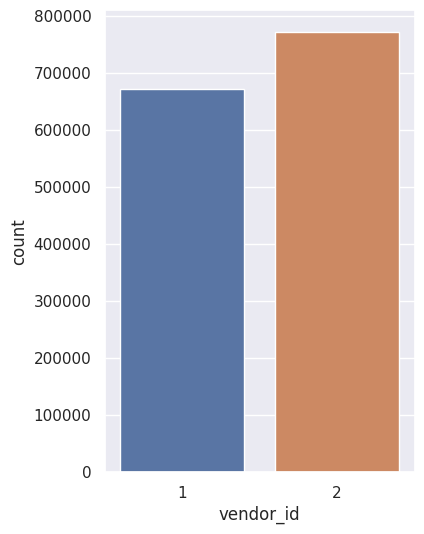

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=df_copy,x='vendor_id')

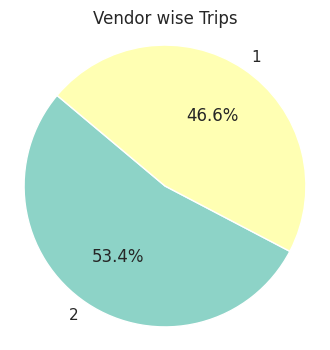

In [ ]:
# Calculate the values and labels for the pie chart
values = df_copy['vendor_id'].value_counts()
labels = values.index

# Create the pie chart
plt.figure(figsize=(4, 4))
sns.set_palette("Set3")
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Customize the chart
plt.title("Vendor wise Trips")
plt.axis('equal')

# Show the pie chart
plt.show()


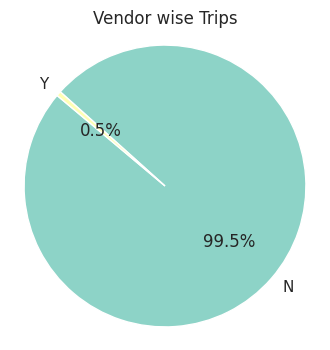

In [ ]:
# Calculate the values and labels for the pie chart
values = df_copy['store_and_fwd_flag'].value_counts()
labels = values.index

# Create the pie chart
plt.figure(figsize=(4, 4))
sns.set_palette("Set3")
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Customize the chart
plt.title("Vendor wise Trips")
plt.axis('equal')

# Show the pie chart
plt.show()


<Axes: xlabel='passenger_count', ylabel='count'>

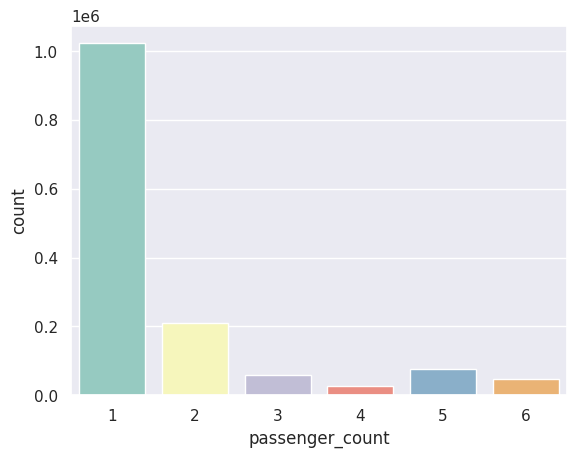

In [ ]:
sns.countplot(data=df_copy,x='passenger_count')

<Axes: xlabel='Pickup_Month', ylabel='count'>

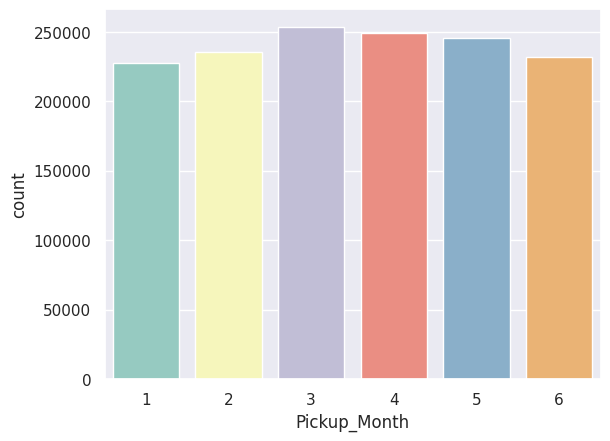

In [ ]:
sns.countplot(data=df_copy,x='Pickup_Month')

([<matplotlib.axis.XTick at 0x782adbf67010>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

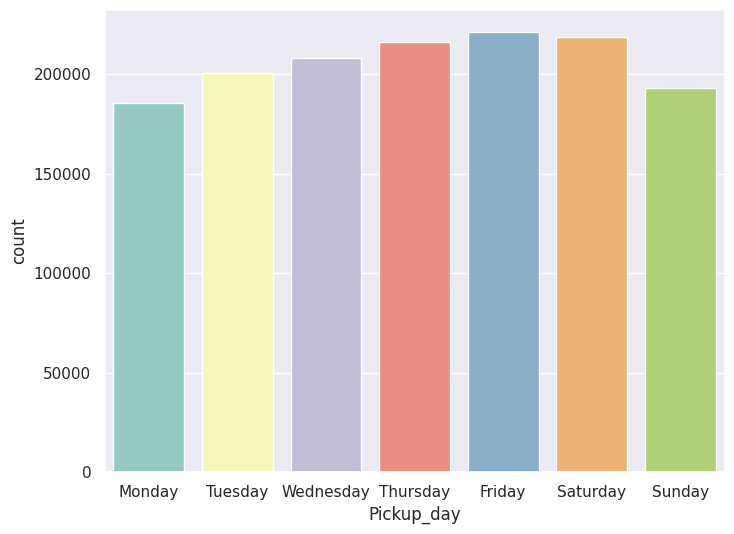

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_copy,x='Pickup_day')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='horizontal')

<Axes: xlabel='time_only', ylabel='count'>

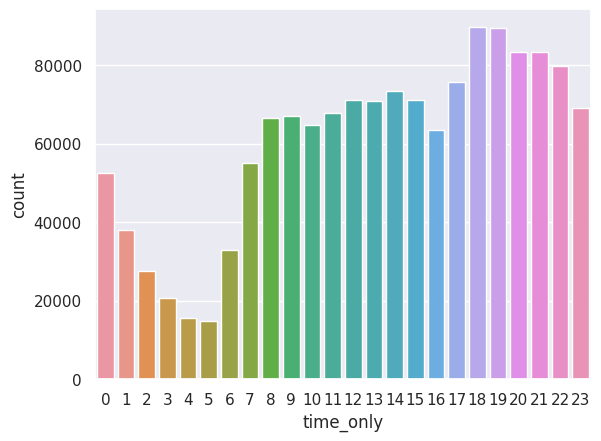

In [ ]:
sns.countplot(data=df_copy,x='time_only')

##### 1. **Why did you pick the specific chart**?

The above codes is used to create a charts using the Seaborn library to visualize the distribution of a categorical variable from a DataFrame df_copy.

> The countplot will display the count (frequency) of each unique 'vendor_id' in the DataFrame as bars on the y-axis, helping you understand the distribution and frequency of each vendor in the dataset. The customized figure size ensures that the plot has specific dimensions.

> The countplot displays the count (frequency) of each unique value in the 'store_and_fwd_flag' column, typically indicating whether data was stored and forwarded ('Y' or 'N'). This visualization helps you understand the distribution of this categorical variable and how often data was stored and forwarded, which can be useful for analysis or decision-making.

> The resulting countplot displays the count (frequency) of each unique passenger count as bars on the y-axis. This allows for a visual representation of the distribution of the number of passengers in the dataset, helping you understand how many trips have a specific number of passengers. The customized figure size ensures that the plot has specific dimensions.

> The resulting countplot will show the distribution of trips on each day of the week, with different colors representing the two vendors. This allows for a visual comparison of trip counts between vendors on different days.

>The countplot displays the count (frequency) of each unique month in the 'Pickup_Month' column. This visualization helps you understand the distribution of taxi pickups across different months, providing insights into any patterns or variations that may exist.

>The countplot displays the count (frequency) of each unique value in the 'time_only' column. This visualization helps you understand the distribution of data within this categorical variable and can provide insights into patterns or variations related to time or specific time categories.

##### 2. **What is/are the insight(s) found from the chart?**

As we can see from the bar chart above:-

> Vendor 2 has more trips compared to Vendor 1.

> Most of the trips are not recorded and not sent to the server

> Most of the trips are taken by a single passenger.

> Considerbly, weekends have more trips.

> Most of the trips occurred in the 3rd and 4th months.

> Most of the tripss occurred between 6 pm to 10 pm.There is a surge of pickups from night 6:00 PM onwards. and peak is around 6:00 PM to 8:00PM. and the peak trend follows until midnight. Early morning starts at 6:00 AM and increases. Early morning, its time to go to work and evening is time to come home or go out.


##### 3. **Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**Benefits of the insights:**

1. **Vendor Comparison:** Knowing that Vendor 2 has more trips compared to Vendor 1 can help the business make informed decisions regarding partnerships, vendor performance, and allocation of resources.

2. **Unrecorded Trips:** Recognizing that most trips are not recorded and not sent to the server can lead to improvements in data recording and analysis, potentially improving service quality and billing accuracy.

3. **Passenger Count:** Understanding that most trips are taken by a single passenger can help optimize vehicle allocation and resource planning for single-passenger trips.

4. **Weekend Traffic:** Identifying that weekends have more trips can aid in scheduling and resource allocation, especially if there are differences in travel patterns and demand on weekends.

5. **Monthly Trends:** Recognizing that most trips occurred in the 3rd and 4th months can help businesses prepare for seasonality or adjust services based on monthly demand fluctuations.

6. **Time of Day Trends:** Understanding the peak hours of 6:00 PM to 8:00 PM and the overall trend of increased trips in the evening can be valuable for both vendors and customers. Vendors can allocate more resources during peak hours, and customers can plan their trips more efficiently.

**Negative Points or Considerations:**

1. **Vendor 1's Performance**: While Vendor 2 has more trips, it's important to investigate why Vendor 1's performance may be lagging, especially when passenger counts exceed four. It's important to ensure fairness and service quality for all vendors.

2. **Unrecorded Trips Issue:** The fact that most trips are not recorded and sent to the server raises concerns about data accuracy and billing. This issue should be addressed to improve service quality and reliability.

3. **Single Passenger Trips:** While most trips are taken by a single passenger, it's essential to understand the reasons behind this pattern. If there are potential safety concerns or inefficiencies, they should be addressed.

4. **Weekend Traffic Variability:** Although weekends have more trips, it's crucial to investigate the specific reasons behind this trend. Are there special events, promotions, or other factors influencing weekend demand? Understanding these nuances can lead to better planning.

5. **Monthly Trends Analysis:** While it's clear that more trips occur in the 3rd and 4th months, the reasons behind these trends should be explored. It's important to determine whether this is related to holidays, seasons, or other factors.

6. **Peak Hours and Service Management:** The surge in pickups during the evening peak hours is an opportunity for service optimization, but it also requires efficient management to handle increased demand without compromising quality.

In summary, these insights offer valuable information for making data-driven decisions and improving the taxi service. However, it's essential to dig deeper into the underlying factors and challenges associated with these trends to maximize the benefits and address any negative points.

#### Chart - Histogram

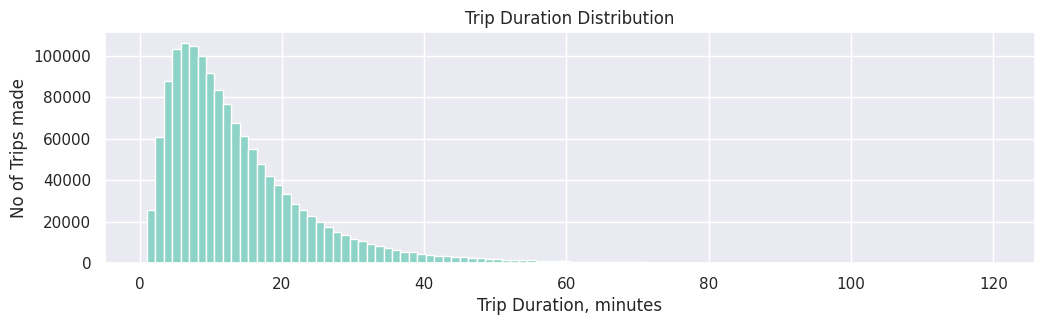

In [ ]:
# trip duration distribution, minutes
plt.figure(figsize=(12,3))
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration, minutes')
plt.ylabel('No of Trips made')
plt.hist(df_copy.trip_duration/60, bins=100)
pass

##### 1. Why did you pick the specific chart?

The above code generates a histogram to visualize the distribution of trip durations in minutes using a DataFrame (df_copy).

The resulting plot provides an overview of how trip durations are distributed, helping to identify patterns and variations in the data. It allows you to see how many trips fall within specific duration ranges, providing insights into the dataset's characteristics.

##### 2. What is/are the insight(s) found from the chart?

It effectively conveys that the majority of trips fall within the time range of 5 to 15 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart above will help the business assess the average duration of people's trips.

#### Chart - Bar

vendor_id
1   836.350
2   845.684
Name: trip_duration, dtype: float64


<BarContainer object of 2 artists>

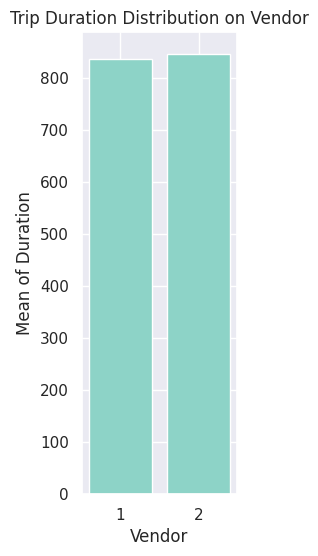

In [ ]:
plt.figure(figsize=(2,6))
plt.title('Trip Duration Distribution on Vendor')
plt.xlabel('Vendor')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('vendor_id')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

Pickup_day
0   814.300
1   859.495
2   883.458
3   902.292
4   871.319
5   782.452
6   767.085
Name: trip_duration, dtype: float64


<BarContainer object of 7 artists>

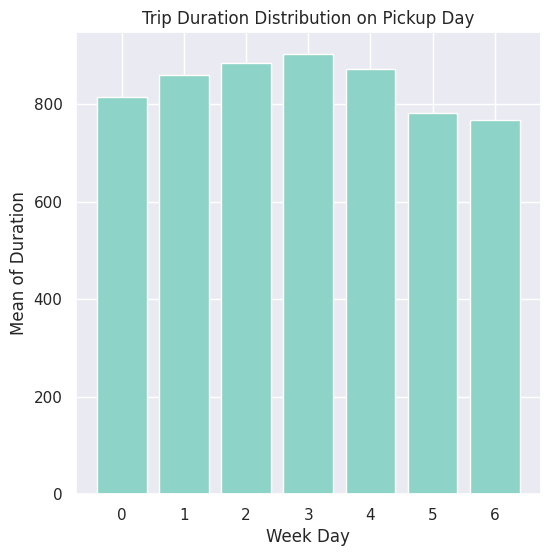

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Trip Duration Distribution on Pickup Day')
plt.xlabel('Week Day')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('Pickup_day')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

passenger_count
1   829.867
2   881.009
3   870.474
4   891.597
5   846.534
6   839.560
Name: trip_duration, dtype: float64


<BarContainer object of 6 artists>

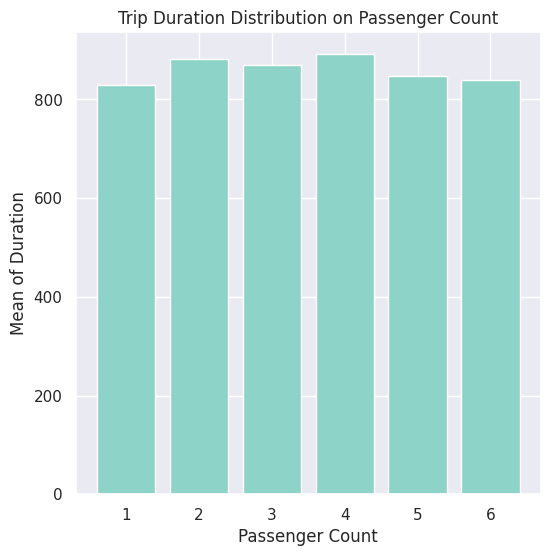

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Trip Duration Distribution on Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('passenger_count')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

store_and_fwd_flag
N    839.931
Y   1097.663
Name: trip_duration, dtype: float64


<BarContainer object of 2 artists>

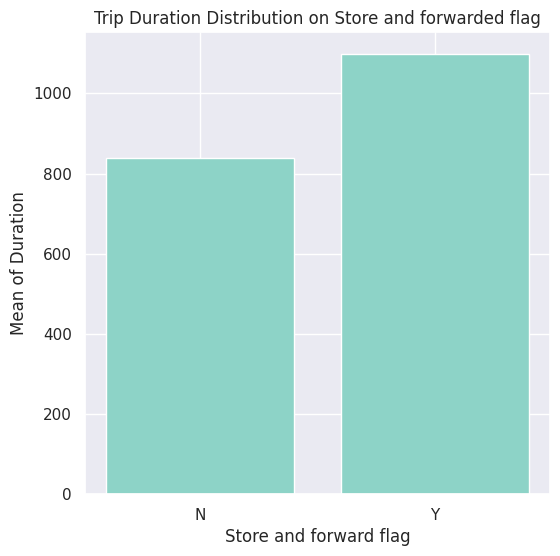

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Trip Duration Distribution on Store and forwarded flag')
plt.xlabel('Store and forward flag')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('store_and_fwd_flag')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

Pickup_Month
1   794.846
2   794.060
3   821.686
4   852.721
5   887.701
6   895.132
Name: trip_duration, dtype: float64


<BarContainer object of 6 artists>

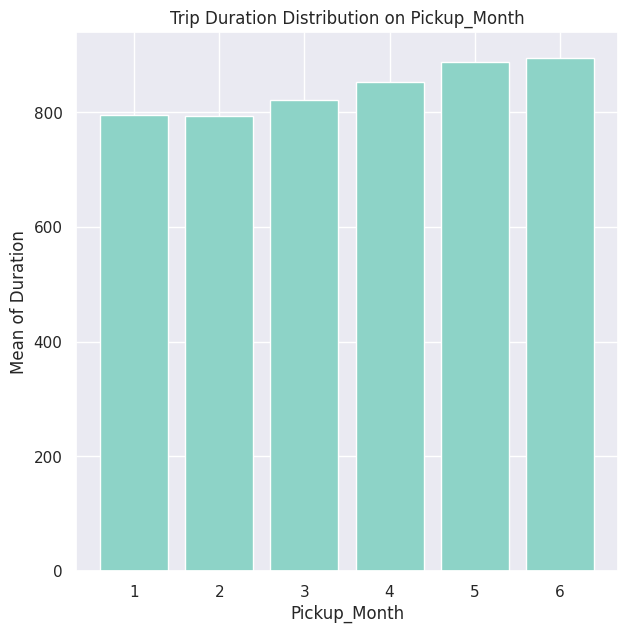

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Trip Duration Distribution on Pickup_Month')
plt.xlabel('Pickup_Month')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('Pickup_Month')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

time_only
0    786.194
1    744.584
2    707.558
3    709.069
4    743.211
5    720.762
6    676.561
7    762.945
8    838.463
9    847.456
10   851.863
11   880.120
12   882.466
13   901.492
14   951.859
15   970.494
16   969.889
17   936.230
18   864.336
19   793.732
20   772.216
21   780.434
22   808.700
23   816.766
Name: trip_duration, dtype: float64


<BarContainer object of 24 artists>

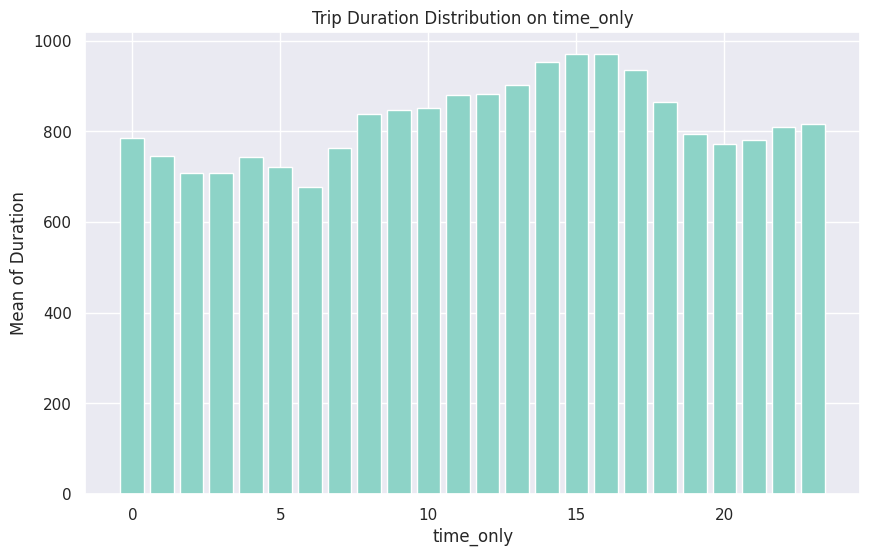

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Trip Duration Distribution on time_only')
plt.xlabel('time_only')
plt.ylabel('Mean of Duration')
average_trip = df_copy.groupby('time_only')['trip_duration'].mean()
print(average_trip)
plt.bar(average_trip.index,average_trip.values)

##### 1. Why did you pick the specific chart?

The above code creates a bar chart to visualize the distribution of trip duration means across different time intervals represented by the 'time_only' column in the DataFrame (df_copy).

> The resulting chart provides a visual representation of the average trip duration for different vendors, allowing for a comparison of trip duration patterns between the vendors in the dataset.

> The resulting chart provides a visual representation of the average trip duration for different days of the week, allowing for an analysis of trip duration patterns based on the day of pickup.

>The resulting chart provides a visual representation of the average trip duration for different passenger counts, allowing for an analysis of how trip duration varies with the number of passengers on board.

>The resulting chart provides a visual representation of the average trip duration for different store and forward flags, allowing for an analysis of how trip duration varies with this flag's status.

> The resulting chart provides a visual representation of the average trip duration for different months of pickup, allowing for an analysis of how trip duration varies throughout the year.

> The resulting chart provides a visual representation of the average trip duration for different time categories, allowing for an analysis of how trip duration varies during specific times of the day or other time-related divisions.

##### 2. What is/are the insight(s) found from the chart?

We gain following insights from the above charts:-

1. The mean trip duration is nearly the same for both vendors.

2. The mean trip duration is highest on Thursdays and lowest on Sundays.

3. Passenger counts of 2 and 4 have the highest mean trip durations.

4. Trips with the "Store and Fwd No" flag have the highest mean trip durations.

5. May and June exhibit the highest mean trip durations.

6. The mean trip duration peaks between 2 to 4 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here's a breakdown of the benefits of each insight:

1. **Vendor Comparison**: Comparing the mean trip duration between different vendors can help identify if there are significant differences in service quality or efficiency. If the means are similar, it suggests that both vendors provide consistent trip durations, which can be valuable for customers looking for reliable service.

2. **Day-of-Week Analysis**: Knowing that mean trip duration is higher on Thursdays and lower on Sundays can be used for resource allocation and pricing strategies. For example, if there is higher demand on Thursdays, vendors can ensure they have more drivers available during peak hours.

3. **Passenger Count Impact**: Understanding that passenger counts of 2 and 4 have the highest mean trip duration can be used for planning. For instance, vendors might consider offering larger vehicles for groups of 2 or 4 passengers to improve customer satisfaction.

4. **Store and Forward Flag Analysis**: The insight that "store and fwd no" is associated with the highest mean duration suggests that real-time communication with the server may lead to shorter trip durations. Vendors can use this information to optimize their systems for real-time data transmission.

5. **Month Analysis**: Identifying that May and June have the highest mean trip duration can be used to anticipate increased demand and potential traffic during these months. Vendors may adjust their operations and pricing strategies accordingly.

6. **Time of Day Impact**: Recognizing that mean trip duration is high from 2 to 4 pm can help vendors prepare for higher demand and potential delays during these hours. They may allocate more drivers or offer incentives to encourage rides during less busy times.

These insights provide a data-driven foundation for vendors to optimize their services, improve customer experience, and make informed decisions regarding factors such as pricing, resource allocation, and service quality.






#### Chart -Count and mean of duration plotting

In [ ]:
def df_count_mean_with_chart(newdf):
  for i in categorical_variables:
    print(" ")
    a=newdf.groupby(i)['trip_duration'].count().sort_values(ascending = False).reset_index(name="Duration count")
    b=newdf.groupby([i])['trip_duration'].mean().sort_values(ascending = False).reset_index(name="Duration mean")
    c = a.merge(b, on=i)
    c=c.sort_values(by = 'Duration mean', ascending=True)
    print(c)

    plt.figure(figsize=(df_copy[i].nunique(), 6))
    plt.bar(c[i], c['Duration count'], label='Duration count', alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title(f'Duration Count for Different {i}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
    plt.show()

    plt.figure(figsize=(df_copy[i].nunique(), 6))
    plt.bar(c[i], c['Duration mean'], label='Duration mean', alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Mean')
    plt.title(  f'Duration Mean for different {i} ')
    plt.legend()
    plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
    plt.show()

 
   vendor_id  Duration count  Duration mean
1          1          672168        836.350
0          2          771392        845.684


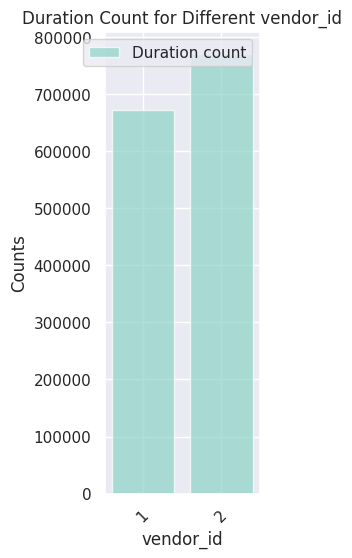

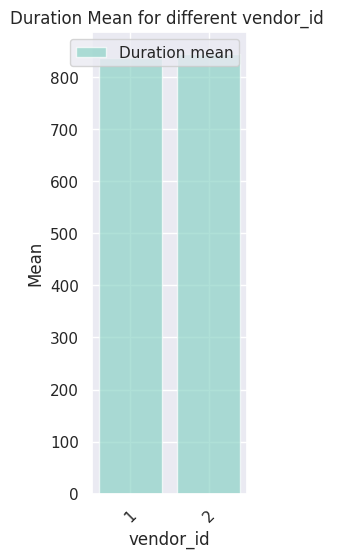

 
   passenger_count  Duration count  Duration mean
0                1         1022521        829.867
4                6           47773        839.560
2                5           77317        846.534
3                3           59385        870.474
1                2          208448        881.009
5                4           28116        891.597


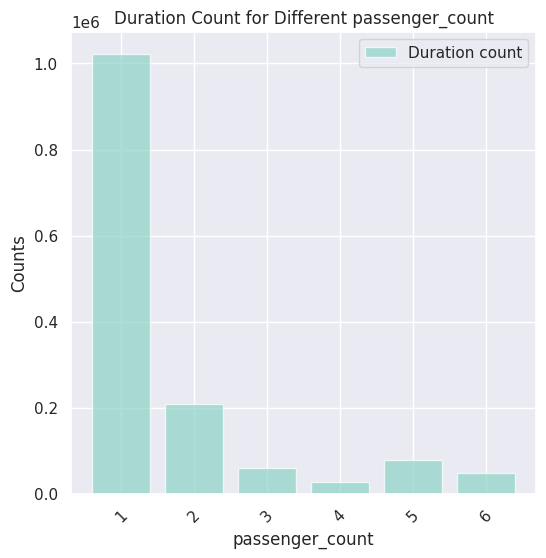

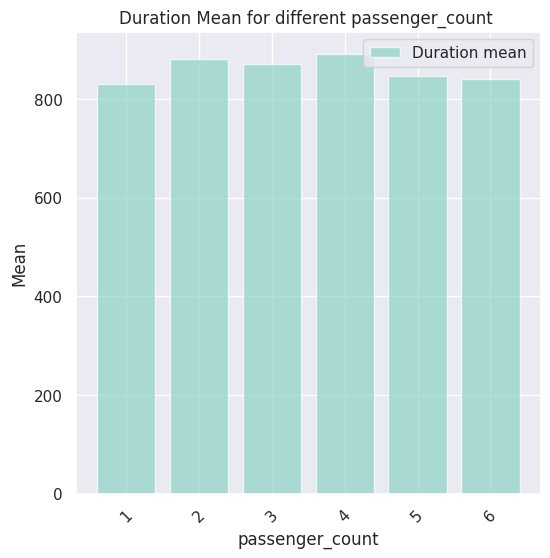

 
  store_and_fwd_flag  Duration count  Duration mean
0                  N         1435682        839.931
1                  Y            7878       1097.663


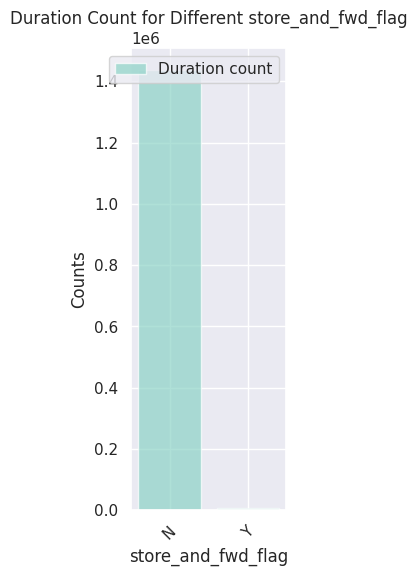

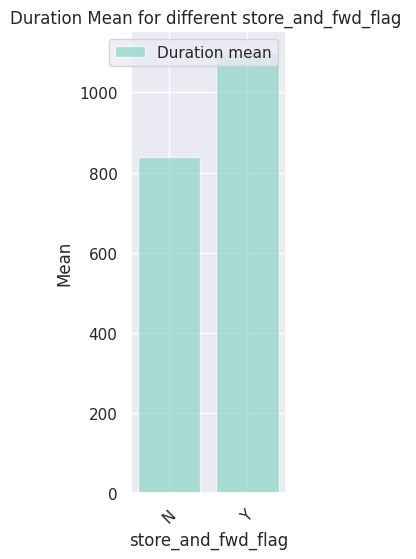

 
   Pickup_Month  Duration count  Duration mean
3             2          235901        794.060
5             1          227314        794.846
0             3          253619        821.686
1             4          249007        852.721
2             5          245919        887.701
4             6          231800        895.132


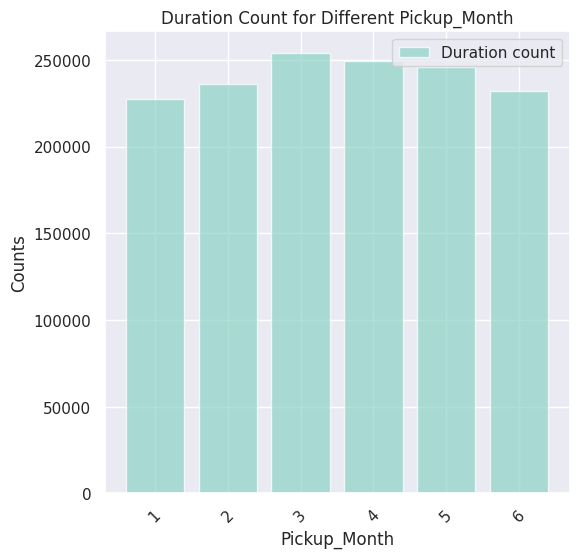

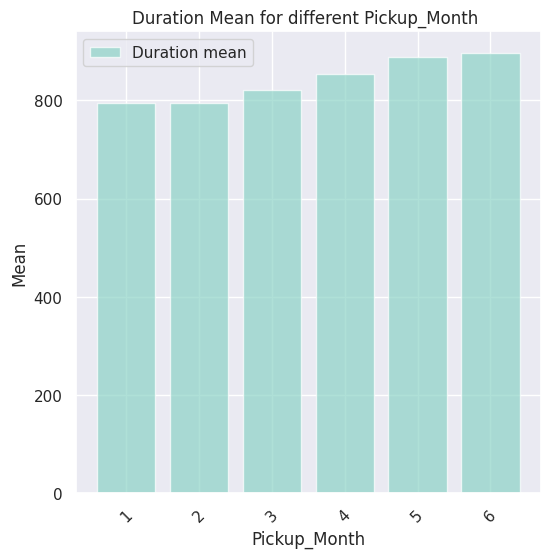

 
   Pickup_day  Duration count  Duration mean
5           6          193124        767.085
1           5          218558        782.452
6           0          185544        814.300
4           1          200704        859.495
0           4          221193        871.319
3           2          208138        883.458
2           3          216299        902.292


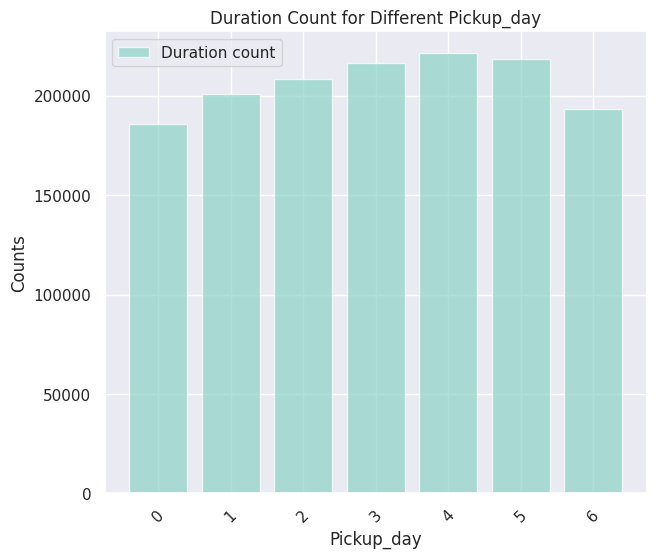

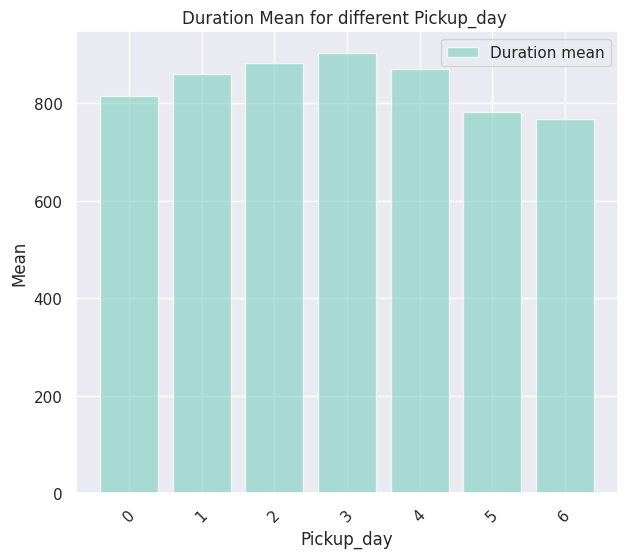

 
    time_only  Duration count  Duration mean
19          6           32852        676.561
20          2           27602        707.558
21          3           20585        709.069
23          5           14746        720.762
22          4           15486        743.211
18          1           38108        744.584
16          7           55063        762.945
3          20           83309        772.216
2          21           83355        780.434
17          0           52625        786.194
1          19           89480        793.732
4          22           79708        808.700
10         23           69094        816.766
13          8           66428        838.463
12          9           67069        847.456
14         10           64839        851.863
0          18           89741        864.336
11         11           67808        880.120
7          12           71142        882.466
9          13           70758        901.492
5          17           75693        936.230
6       

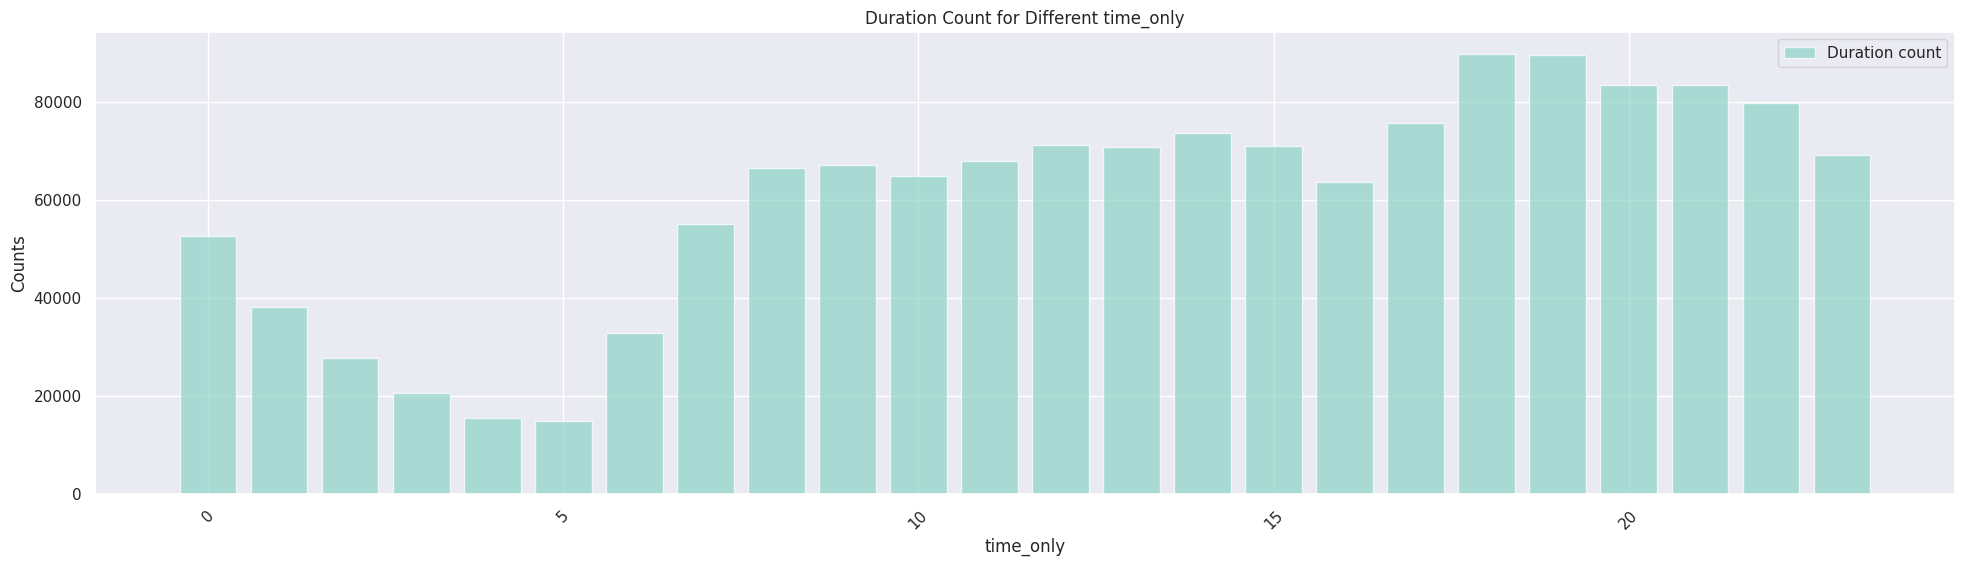

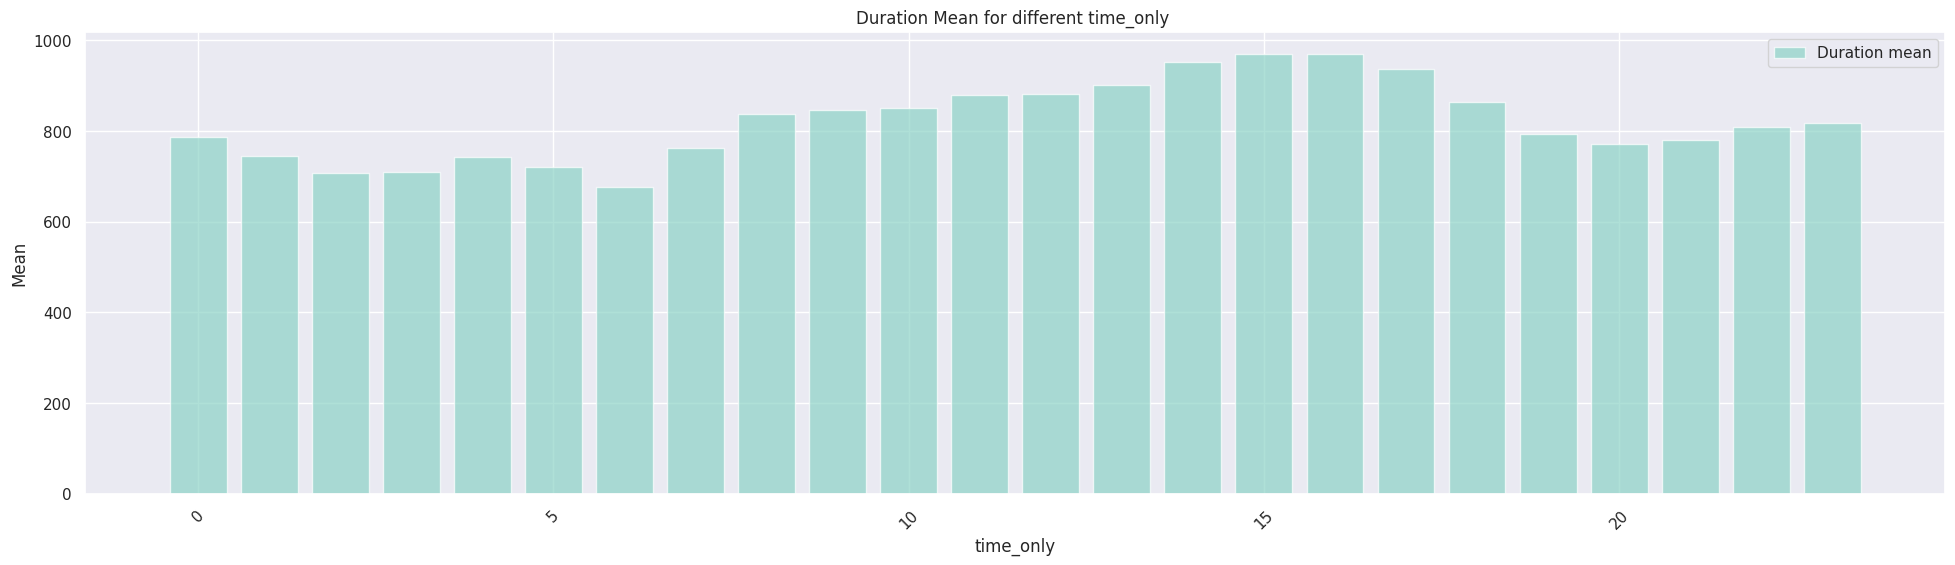

In [ ]:
df_count_mean_with_chart(df_copy)

**From the insights gained from the bar chart and further analysis, we discover the following additional information:**

1. **Vendor Comparison:** While Vendor 2 has more trips than Vendor 1, the mean trip duration is nearly the same for both vendors.

2. **Day of the Week:** The mean trip duration exhibits variations based on the day of the week, with the highest duration observed on Thursdays and the lowest on Sundays.

3. **Passenger Count:** Trips with passenger counts of 2 and 4 tend to have the highest mean trip durations.

4. **Store and Forward Flag:** Trips with the "Store and Fwd No" flag show the highest mean trip durations, indicating that real-time trips tend to have longer durations.

5. **Monthly Trends:** May and June stand out with the highest mean trip durations, suggesting potential factors driving longer trips during these months.

6. **Time of Day:** The mean trip duration follows a distinct pattern throughout the day, peaking between 2 PM and 4 PM. This could be related to specific peak hours of demand or traffic conditions.

These combined insights provide a comprehensive view of trip duration trends, enabling businesses to make data-driven decisions regarding vendor performance, passenger count considerations, and optimal timing for longer trips.

#### Chart -Bar

<BarContainer object of 50 artists>

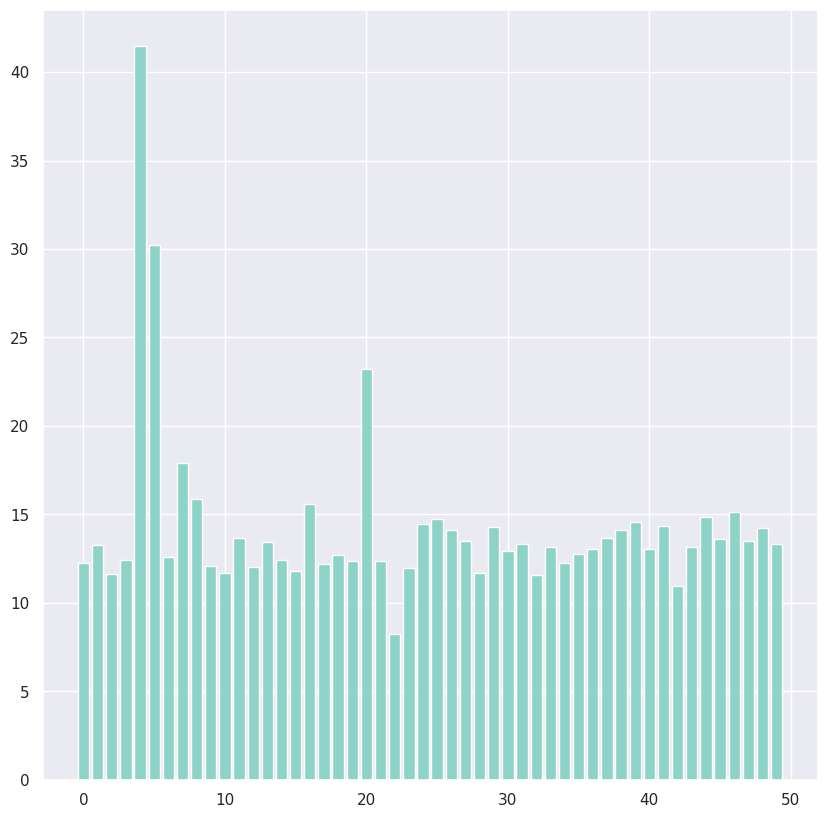

In [ ]:
plt.figure(figsize=(10,10))
average_pickup_time = df_copy.groupby('pickup_cluster')['trip_in_minutes'].mean()
plt.bar(average_pickup_time.index,average_pickup_time.values)

This code generates a bar plot to visualize the average pickup time (in minutes) for different pickup clusters.

This plot helps visualize the average pickup times across different pickup clusters, providing insights into the time it takes for trips to start in specific locations.

Cluster 2 has more trip time as the pickup is JFK airport.

#### Chart - Correlation Heatmap

<Axes: >

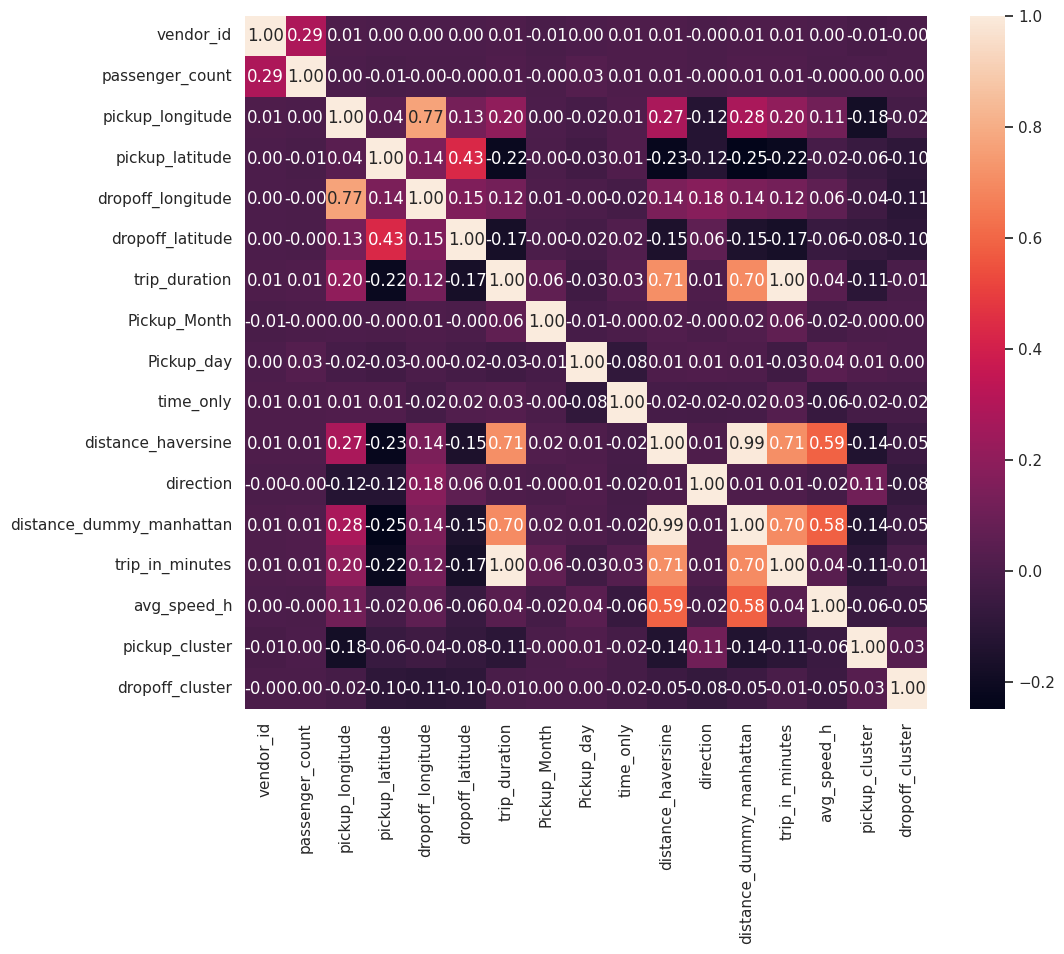

In [ ]:
plt.figure(figsize=(11,9))
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

##### 1. Why did you pick the specific chart?

The provided code generates a heatmap using Seaborn to visualize the correlation between different numerical variables in the 'df_copy' DataFrame. Heatmaps are useful for quickly identifying patterns and relationships between variables.

The resulting heatmap provides a visual representation of the correlations between different pairs of numerical variables in the dataset. The color intensity of each cell in the heatmap indicates the strength and direction of the correlation. Positive correlations are often displayed in warmer colors (e.g., shades of red), while negative correlations are displayed in cooler colors (e.g., shades of blue or green). Values close to 1 or -1 indicate a strong correlation, while values close to 0 indicate a weak or no correlation.

This visualization helps in understanding how variables in the dataset are related to each other, which can be valuable for feature selection, identifying multicollinearity, and gaining insights into the data's underlying structure.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see relationship between Distance and Duration

## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

There must be at least one passenger onboard.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

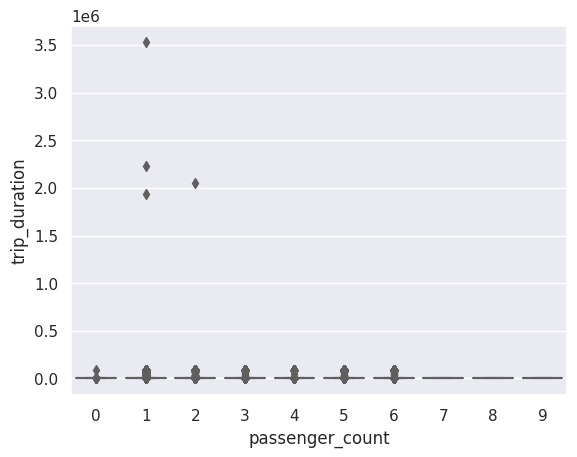

In [ ]:
#Data before removing outlier
x=df['passenger_count']
y=df['trip_duration']
sns.boxplot(x=x, y=y)

The provided code creates a box plot using the Seaborn library to visualize the relationship between two numerical variables: 'passenger_count' and 'trip_duration'. The data used for this plot is the original data (i.e., "Data before removing outlier") before any outlier removal.

The resulting box plot shows how the distribution of trip duration varies for different passenger count categories in the original dataset. Each box in the plot represents a category of passenger count, and it displays statistics such as the median, quartiles, and potential outliers for trip duration within that category.

This visualization helps us understand if there are differences in trip duration based on the number of passengers and whether there are outliers in the original data before any outlier removal.

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

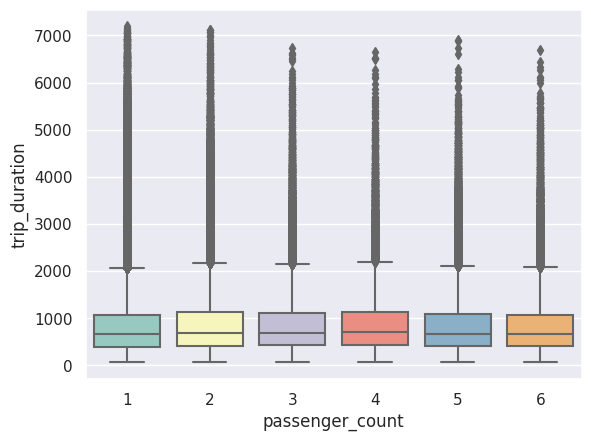

In [ ]:
#Data after removing outlier
x=df_copy['passenger_count']
y=df_copy['trip_duration']
sns.boxplot(x=x, y=y)

The above code creates a box plot using the Seaborn library to visualize the relationship between two numerical variables: 'passenger_count' and 'trip_duration'. The data has been preprocessed to remove outliers before creating the plot.

The resulting box plot shows how the distribution of trip duration varies for different passenger count categories. Each box in the plot represents a category of passenger count, and it displays statistics such as the median, quartiles, and potential outliers for trip duration within that category.

This visualization helps us understand if there are differences in trip duration based on the number of passengers and whether there are outliers in the data after removing them during preprocessing.

### Hypothetical Statement - 2

The distance covered in a trip cannot be less than 500 meters and The trip cannot be start from out of the city. If it is, it could be an indicator of trip cancellation.

<Axes: xlabel='distance_haversine', ylabel='trip_duration'>

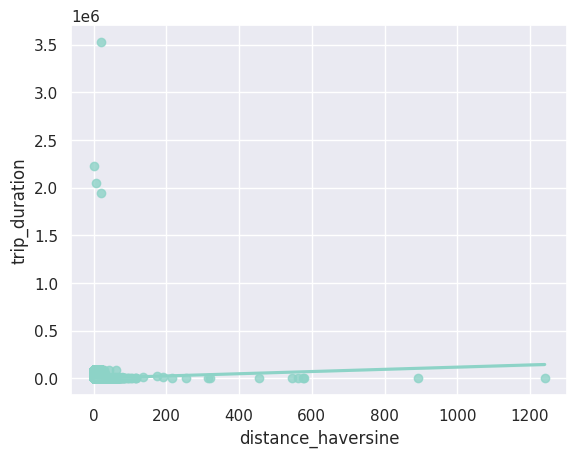

In [ ]:
x=df['distance_haversine']
y=df['trip_duration']
sns.regplot(x=x, y=y)

<Axes: xlabel='distance_haversine', ylabel='trip_duration'>

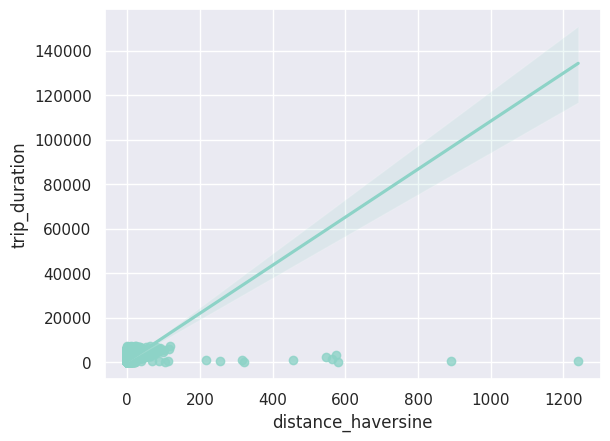

In [ ]:
x=df_copy['distance_haversine']
y=df_copy['trip_duration']
sns.regplot(x=x, y=y)

The above code creates a regression plot using the Seaborn library to visualize the relationship between two numerical variables: 'distance_haversine' (representing the distance of taxi trips in haversine units) and 'trip_duration' (representing the duration of taxi trips in seconds).

The resulting plot provides insights into how the duration of taxi trips ('trip_duration') varies concerning the distance of the trips ('distance_haversine'). It helps to understand if there's a linear relationship between these two variables and if trip duration can be predicted based on the distance traveled.

### Hypothetical Statement - 3

The taxi trip duration cannot be less than 1 min. If it is, it may be due to trip cancellations. The taxi trip duration cannot exceed 2 hours. If it does, it may be due to traffic delays.

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

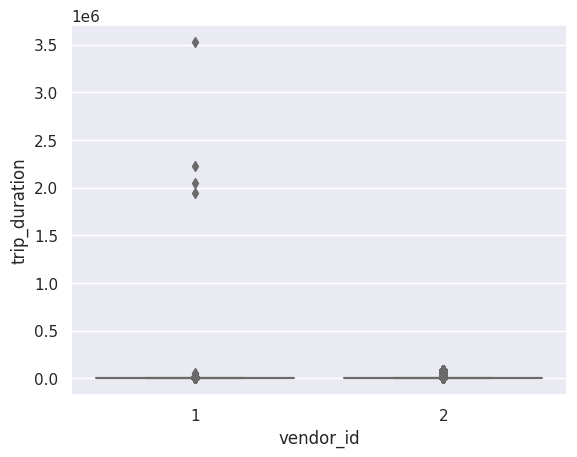

In [ ]:
#####Data before removing outlier
x=df['vendor_id']
y=df['trip_duration']
sns.boxplot(x=x, y=y)

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

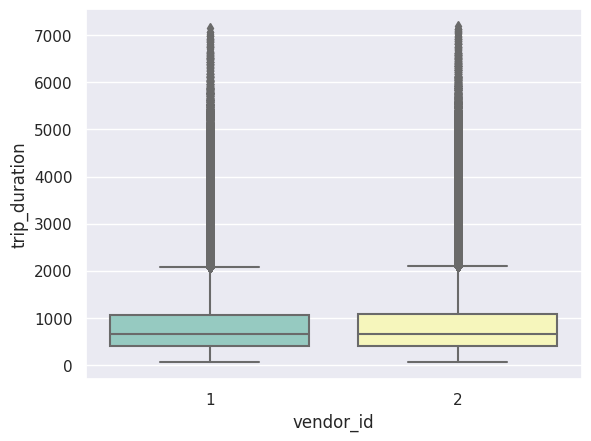

In [ ]:
#Data after removing outlier
x=df_copy['vendor_id']
y=df_copy['trip_duration']
sns.boxplot(x=x, y=y)

The provided code is creating a box plot to visualize the distribution of trip durations for different vendor IDs.


The resulting plot will have two side-by-side boxes, one for each unique 'vendor_id.' It allows us to compare the distribution of trip durations between the two vendors, making it easier to identify differences or similarities in trip durations based on the vendor ID.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We already handled missing values in the data wrangling part

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values; hence, we did not use any coding to replace missing values

### 2. Handling Outliers

We already removed outliers in the data wrangling part.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used below code to remove the outliers:-

**To check that which trips are out of New York City**

outofcity=df_copy.loc[(df_copy['pickup_latitude'] <= 40.637044) & (df_copy['pickup_latitude'] >= 40.855256)]
outofcity=df_copy.loc[(df_copy['pickup_longitude'] <= -74.035735) & (df_copy['pickup_longitude'] >= -73.770272)]
outofcity.shape

**Remove 0, 7,8 and 9 Passenger Count**

mask = (df_copy['passenger_count'] != 0) & (df_copy['passenger_count'] != 7) & (df_copy['passenger_count'] != 8) & (df_copy['passenger_count'] != 9)
df_copy = df_copy[mask]


**Removing lest than 1 min and more than 2 hours**

Since there are less than 10k rows with anomalies in trip_duration (in common sense),
we can safely remove them
duration_mask = ((df_copy.trip_duration < 60) | # < 1 min
             (df_copy.trip_duration > 3600*2)) # > 2 hours

print('Anomalies in trip duration, %: {:.2f}'.format(
    df_copy[duration_mask].shape[0] / df_copy.shape[0] * 100
))

df_copy = df_copy[~duration_mask]
df_copy.trip_duration = df_copy.trip_duration.astype(np.uint16)

let's see range now
print('Trip duration in seconds: {} to {}'.format(
    df_copy.trip_duration.min(), df_copy.trip_duration.max()
))



Removing which have 0 distance

df_copy=df_copy[df_copy['distance_haversine']!=0]


### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
data = pd.get_dummies(df_copy,columns=['store_and_fwd_flag'])

The above code is performing one-hot encoding on the 'df_copy' DataFrame, specifically on the column 'store_and_fwd_flag'.

This transformation allows machine learning models to work with categorical data more effectively, as they typically require numerical inputs. The result is a new DataFrame called 'data' that includes these one-hot encoded columns, making it suitable for model training.

In [ ]:
data=data.drop(columns=[ 'avg_speed_h', 'pickup_cluster', 'dropoff_cluster','trip_in_minutes',  ])

The above code is removing specific columns from the 'data' DataFrame. The columns being removed are 'pickup_cluster', 'dropoff_cluster', and 'trip_in_minutes'.

The code is used to reduce the dimensionality of the 'data' DataFrame by removing these specific columns. This might be done to focus on more relevant features, improve model performance, or simplify the dataset for further analysis.

In [ ]:
y_data = data['trip_duration']
X_data = data.drop(['trip_duration'],axis=1)

The above code is preparing the dataset for modeling by splitting it into predictor variables (features) and the target variable.

 'y' represents the target variable ('trip_duration'), and 'X' contains all the predictor variables (features) for modeling. This separation is a common practice when preparing data for machine learning tasks, making it easier to build and train predictive models.

### 4. Data Splitting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,random_state=42,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1010492, 14), (433068, 14), (1010492,), (433068,))

##### What data splitting ratio have you used and why?

The above code is related to splitting a dataset into training and testing subsets for machine learning.

The code splits a dataset into training and testing sets, with 70% of the data used for training and 30% for testing, and it ensures that the split is reproducible by setting a random seed. The shapes of the resulting subsets are printed to verify the sizes of the training and testing data.

The data splitting ratio I have used is 70% training data and 30% testing data. I chose this ratio because it is a common practice in machine learning to split the data into a larger portion for training (70%) to ensure the model learns from a substantial amount of data and a smaller portion for testing (30%) to evaluate the model's performance on unseen data. This helps in assessing how well the model generalizes to new, unseen examples and provides a good trade-off between training and evaluation.

## ***6. ML Model Implementation***

### Defiing some function for ML Model

In [ ]:
def evaluation_metrics(X_train,y_train, y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-(1-(R2_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
  print("Mean Squared Error:", MSE, "Root Squared Error:", RMSE)
  print("R2 Score:", R2_score, "Adjusted R2 Score:", Adjusted_R2_score)
  #plotting actual and predicted values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red')
  plt.plot((np.array(y_train))[:100], color='green')
  plt.legend(["Predicted", "Actual"])
  plt.title('Actual and Predicted Time duration')

The Above code defines a Python function named evaluation_metrics, which is used to calculate and display various evaluation metrics for a machine learning model's performance.

The code prints out the computed evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) Score, and Adjusted R-squared Score.

**Plotting Actual and Predicted Values:**
> The code generates a line plot to visually compare the first 100 values of the predicted y_predicted and the actual y_train target values.

> The predicted values are plotted in red, while the actual values are plotted in green.

> A legend is added to the plot to distinguish between the predicted and actual values.

> The plot has a title indicating that it represents the "Actual and Predicted Time Duration."

This function is designed to provide a summary of how well a machine learning model's predictions align with the actual data. It calculates and displays common regression evaluation metrics and offers a visual comparison between actual and predicted values for the initial 100 data points.

In [ ]:
def feature_importance(ML_model_):
  importance=ML_model_.feature_importances_
  imp_dict={'Feature': list(X_data.columns),
            'Feature Importance': importance}
  importance_df=pd.DataFrame(imp_dict)
  importance_df.sort_values(by=['Feature Importance'], ascending = False, inplace= True)
  print(importance_df)

  plt.figure(figsize=(16,6))
  plt.title('Feature Importance')
  sns.barplot(x='Feature', y ='Feature Importance', data=importance_df[:10])
  plt.xticks(rotation=45)
  plt.show()

The above code defines a Python function called feature_importance that is used to analyze and visualize the importance of features in a machine learning model.

This function is useful for understanding which features have the most influence on a machine learning model's predictions. It calculates and displays feature importances in a sorted tabular format and provides a visual representation of the top 10 important features using a bar plot.

### ML Model - Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
a=lr.score(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

The above code appears to be related to linear regression modeling and the evaluation of the model's performance.

This code initializes a linear regression model, fits it to the training data, calculates the R-squared value for the training data, and then uses the trained model to make predictions on both the training and test datasets. The R-squared value provides an indication of how well the model fits the training data, and the predictions on the test data can be used for evaluating the model's generalization performance on unseen data.

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 198032.6811 Root Squared Error: 445.0086303657492
R2 Score: 0.5361330922961565 Adjusted R2 Score: 0.5361405203358764


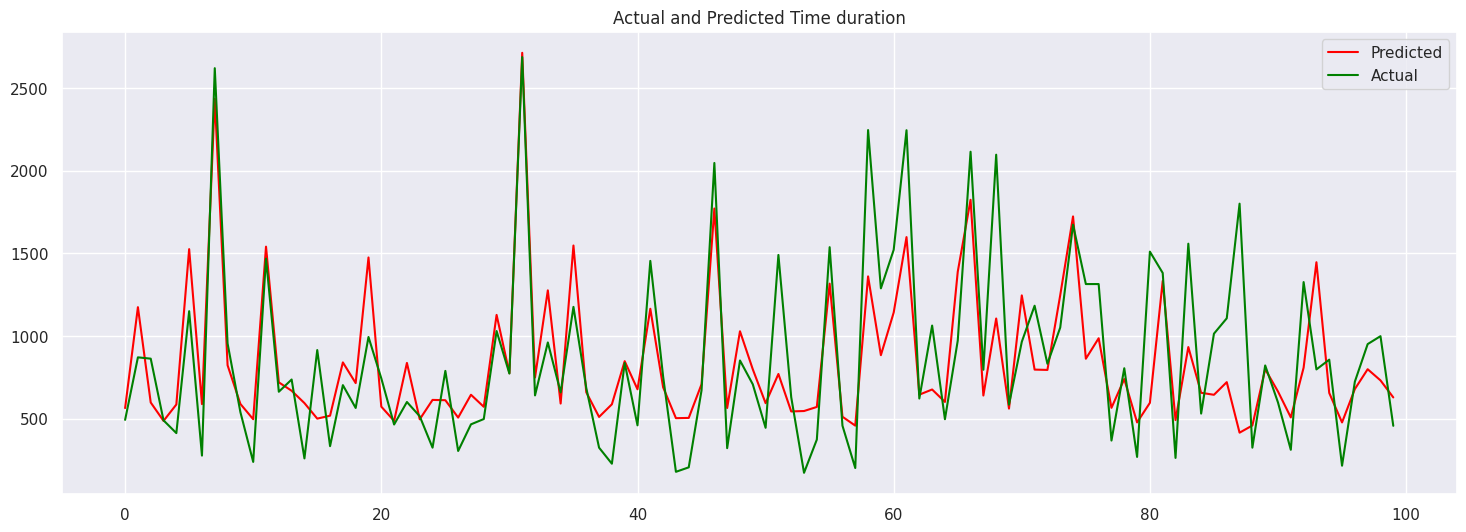

In [ ]:
evaluation_metrics(X_train, y_train,y_pred_train)

In the above graph, result is not good.

Mean Squared Error: 247417.5801 Root Squared Error: 497.4108765397074
R2 Score: 0.42082549374125255 Adjusted R2 Score: 0.42083909844301504


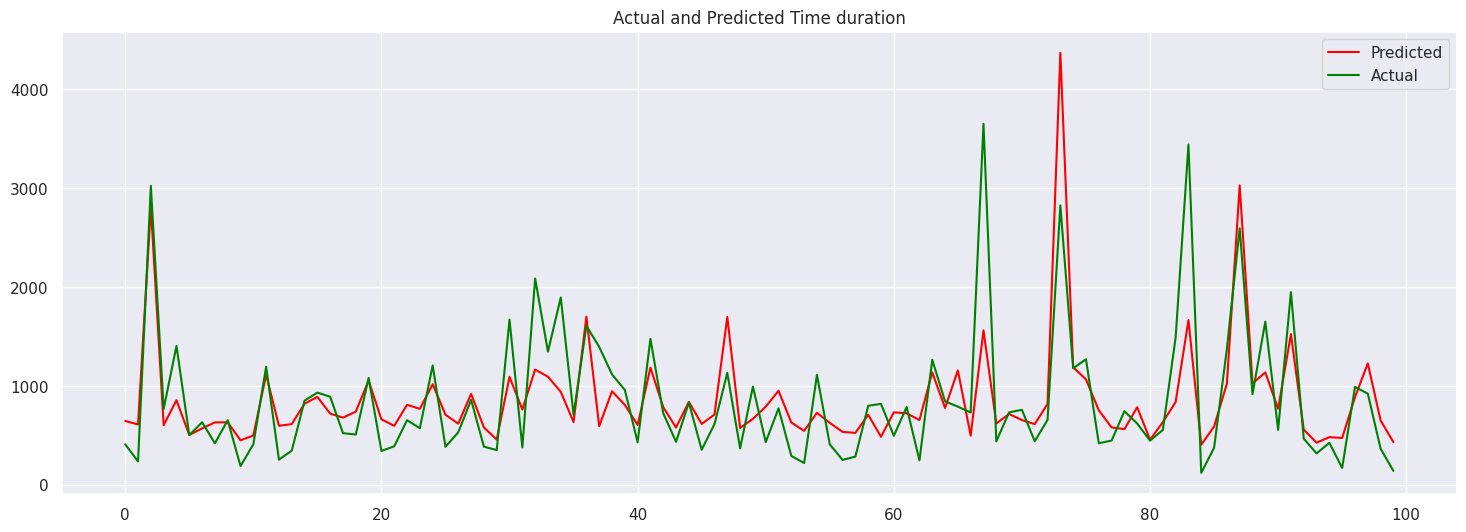

In [ ]:
evaluation_metrics(X_test, y_test,y_pred_test)

### ML Model - Decision Tree

In [ ]:
param_decision_tree={
    'max_depth': [4,6,8,10,12],
    'min_samples_split': [10,20,30],
    'min_samples_leaf' : [6,10,16,20]}
DTR=DecisionTreeRegressor()

#Grid Search
decision_tree_grid=  GridSearchCV(estimator=DTR,
                                  param_grid=param_decision_tree,
                                  cv=5, verbose=2, scoring='r2')
decision_tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   4.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   5.3s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   4.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   5.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   4.3s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   4.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=30; total time=   5.5s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [6, 10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

The above code performs hyperparameter tuning for a Decision Tree Regressor model using a grid search technique.

After executing this code, the decision_tree_grid object will store information about the best hyperparameters and the best-performing Decision Tree Regressor model based on the R-squared score. we can access these results using **decision_tree_grid.best_params_** and **decision_tree_grid.best_estimator_**. This hyperparameter tuning process helps optimize the performance of the Decision Tree Regressor model on the training data.

In [ ]:
#ecision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=20, min_samples_split=20)

In [ ]:
#decision_tree_grid.best_score_

0.7587897118306256

In [ ]:
decision_tree_optimal_model=decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(X_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(X_test)

The above code involves using the best-performing Decision Tree Regressor model obtained from a hyperparameter grid search to make predictions on both the training and test datasets.

The above code takes the best Decision Tree Regressor model obtained from the hyperparameter grid search and uses it to generate predictions on both the training and test datasets. This is a common practice in machine learning to assess how well the optimized model generalizes to new, unseen data (test data) and to ensure that it is not overfitting to the training data. The predicted values can then be used for further evaluation and analysis of the model's performance.

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 97410.4289 Root Squared Error: 312.1064384148459
R2 Score: 0.7718281942821921 Adjusted R2 Score: 0.7718388878405017


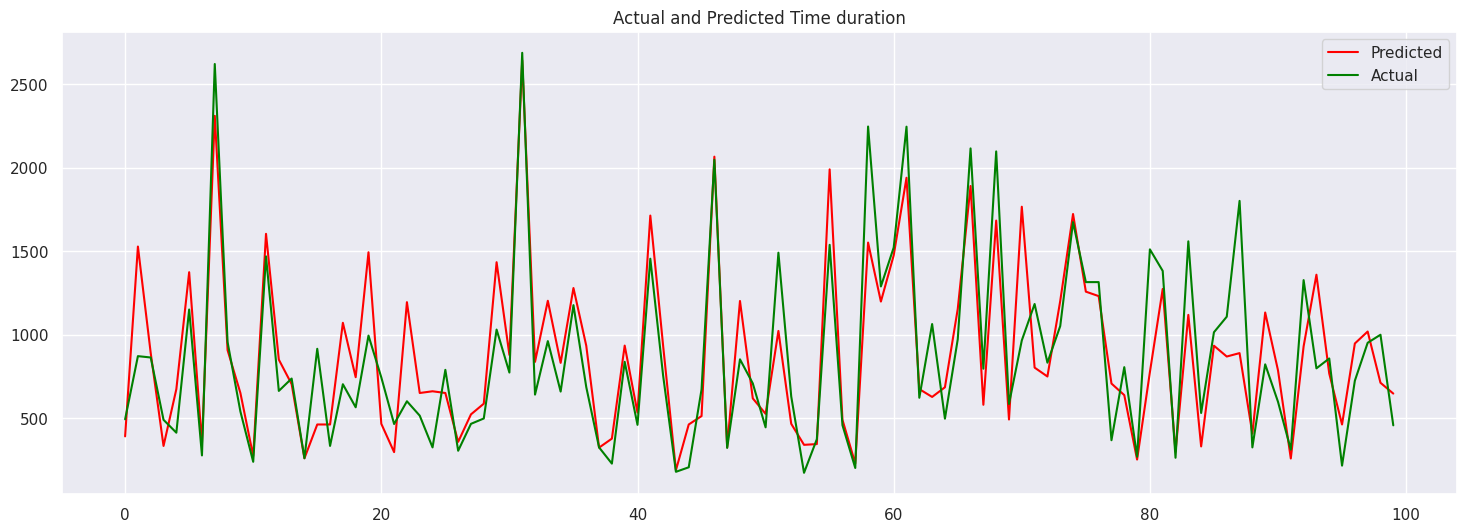

In [ ]:
evaluation_metrics(X_train, y_train,y_predict_train_decision_tree)

Mean Squared Error: 102873.9639 Root Squared Error: 320.73971363085053
R2 Score: 0.7591845445294554 Adjusted R2 Score: 0.7592090879078026


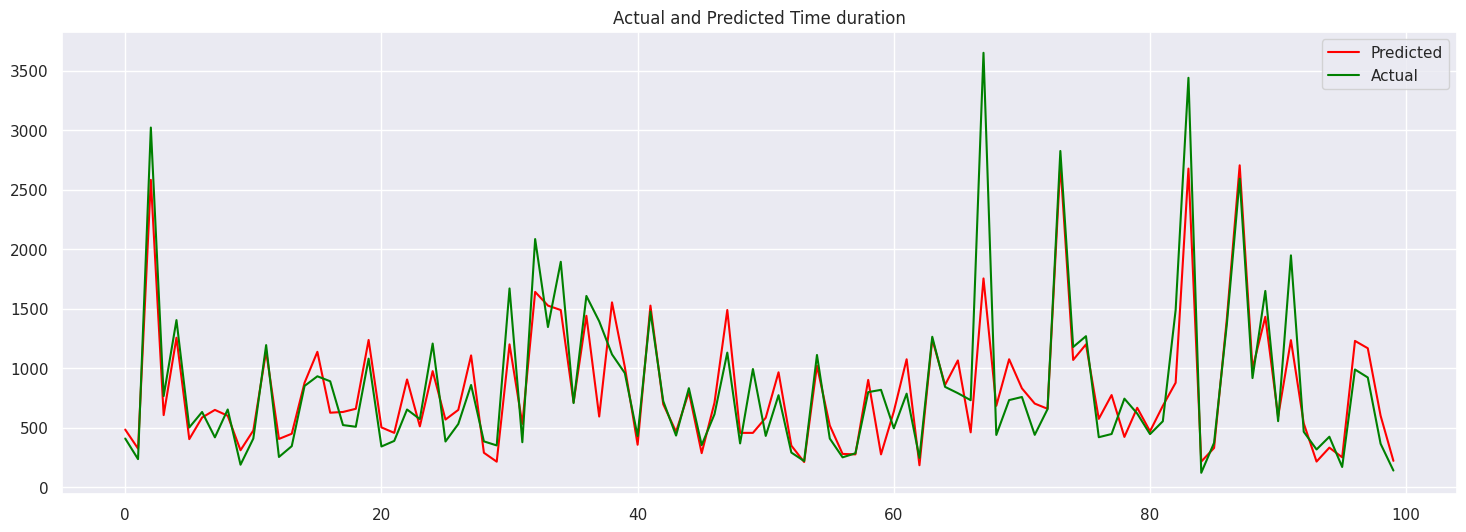

In [ ]:
evaluation_metrics(X_test, y_test,y_predict_test_decision_tree)

[1.40621067e-05 8.57036095e-05 1.14168454e-02 4.38638074e-03
 9.30204660e-03 1.92450751e-02 6.12876554e-03 2.71105338e-02
 8.05146471e-02 8.20545653e-01 1.95232304e-02 1.72705656e-03
 0.00000000e+00 0.00000000e+00]
                     Feature  Feature Importance
9         distance_haversine               0.821
8                  time_only               0.081
7                 Pickup_day               0.027
10                 direction               0.020
5           dropoff_latitude               0.019
2           pickup_longitude               0.011
4          dropoff_longitude               0.009
6               Pickup_Month               0.006
3            pickup_latitude               0.004
11  distance_dummy_manhattan               0.002
1            passenger_count               0.000
0                  vendor_id               0.000
12      store_and_fwd_flag_N               0.000
13      store_and_fwd_flag_Y               0.000


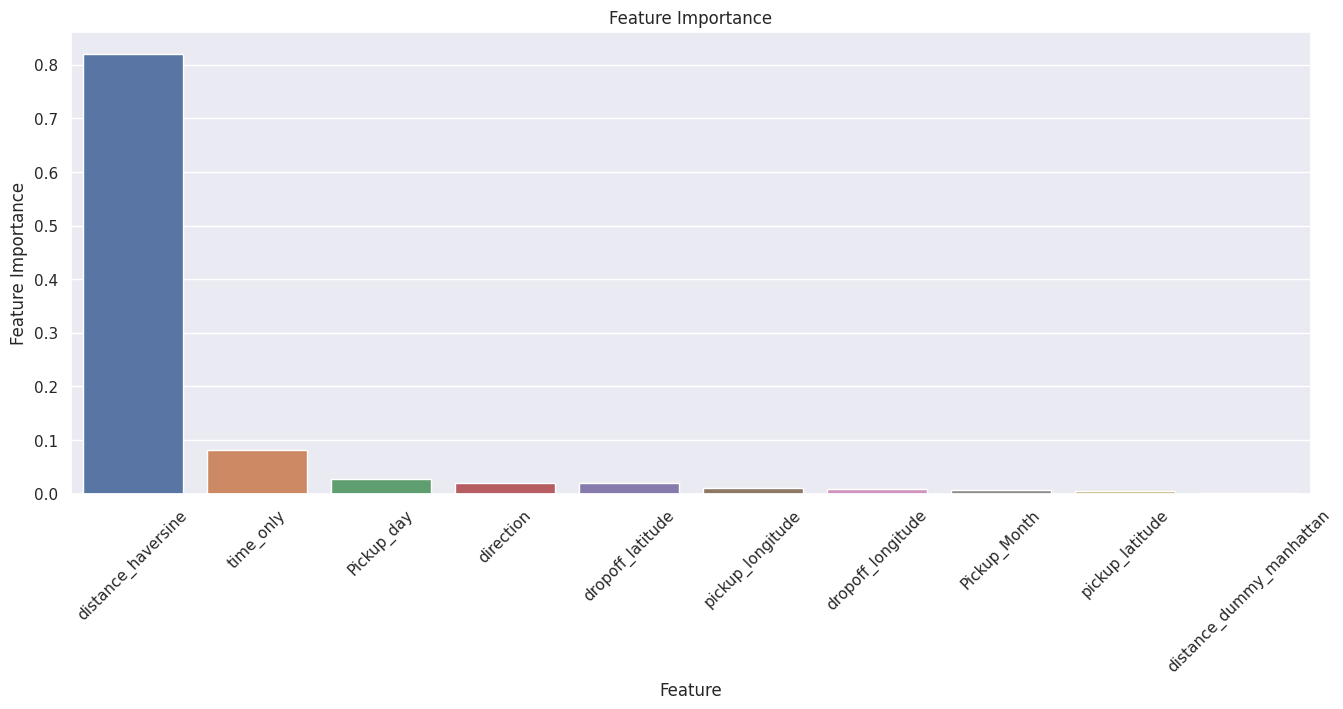

In [ ]:
feature_importance(decision_tree_optimal_model)

According to the chart above, distance is the primary independent variable that has the most significant impact on the dependent variable (Trip Duration), followed by time and, to a lesser extent, the day.

### ML Model - RandomForestRegressor

In [ ]:
RFR=RandomForestRegressor()
param_grid={'n_estimators':[20,22,24],
            'max_features':[0.6],
            'max_depth':[10,16],
            'max_samples': [0.75,1.0]}
print(param_grid)

{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}


The above code snippet appears to be related to setting up hyperparameter values for a Random Forest Regressor model and printing the defined hyperparameter grid.

After running this code, we will have the param_grid dictionary defined, which can be used in conjunction with techniques like grid search or random search to explore different combinations of hyperparameters for our Random Forest Regressor model. The values in the param_grid can be further customized to fit the specific requirements and goals of our modeling task.

In [ ]:
RF_grid=GridSearchCV(estimator =RFR,param_grid=param_grid,cv=2, verbose=2)

The above code snippet sets up a grid search for hyperparameter tuning for a Random Forest Regressor (RFR) model

The above code initializes a grid search for hyperparameter tuning for the Random Forest Regressor model (RFR). The grid search will explore various hyperparameter combinations defined in the param_grid dictionary and evaluate the model's performance using 2-fold cross-validation. The goal is to find the best set of hyperparameters that optimizes the model's performance. After running this code, we can fit the RF_grid object to your data to perform the hyperparameter tuning.

In [ ]:
RF_grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  45.6s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  47.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  52.7s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  50.7s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  55.9s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  55.7s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  57.7s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  55.3s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 1.0min
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

The above code snippet performs the actual grid search for hyperparameter tuning for a Random Forest Regressor (RFR) model using the training data.

This code performs a grid search to find the best hyperparameters for the Random Forest Regressor model by fitting it to the training data. The goal is to optimize the model's performance on the provided training data. The best hyperparameters and model are retained for further use in making predictions on new data.

In [ ]:
RF_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 24}

The above code RF_grid.best_params_ is used to access and retrieve the best set of hyperparameters determined by a grid search using the GridSearchCV object RF_grid.


In [ ]:
RF_grid.best_score_

0.7901180805937286

The above RF_grid.best_score_ is used to access and retrieve the cross-validated performance score (in terms of the scoring metric specified during the grid search) of the best-performing model found during the grid search using the GridSearchCV object RF_grid.

The best score represents how well the model with the optimized hyperparameters performed on the validation data during the grid search. The scoring metric used (e.g., R-squared, mean squared error, etc.) is defined when initializing the GridSearchCV object.

We can use this best score to assess the model's performance on the validation data during the grid search and determine how well the selected hyperparameters improve the model's performance in comparison to other combinations.

In [ ]:
Random_Forest_optimal_model= RF_grid.best_estimator_

In [ ]:
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(X_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(X_test)

The above code is used to make predictions on both the training data and the test data using a Random Forest Regressor model that has been previously optimized.

The above code is performing inference using a Random Forest Regressor model. The model has been previously trained and optimized with the best hyperparameters. By making predictions on both the training and test datasets, we can assess how well the model generalizes to unseen data (test data) and verify its performance on the data it was trained on (training data). These predicted values can be used for further analysis and evaluation of the model's performance.

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 63921.1256 Root Squared Error: 252.82627553322064
R2 Score: 0.8502727190181136 Adjusted R2 Score: 0.8502844994129829


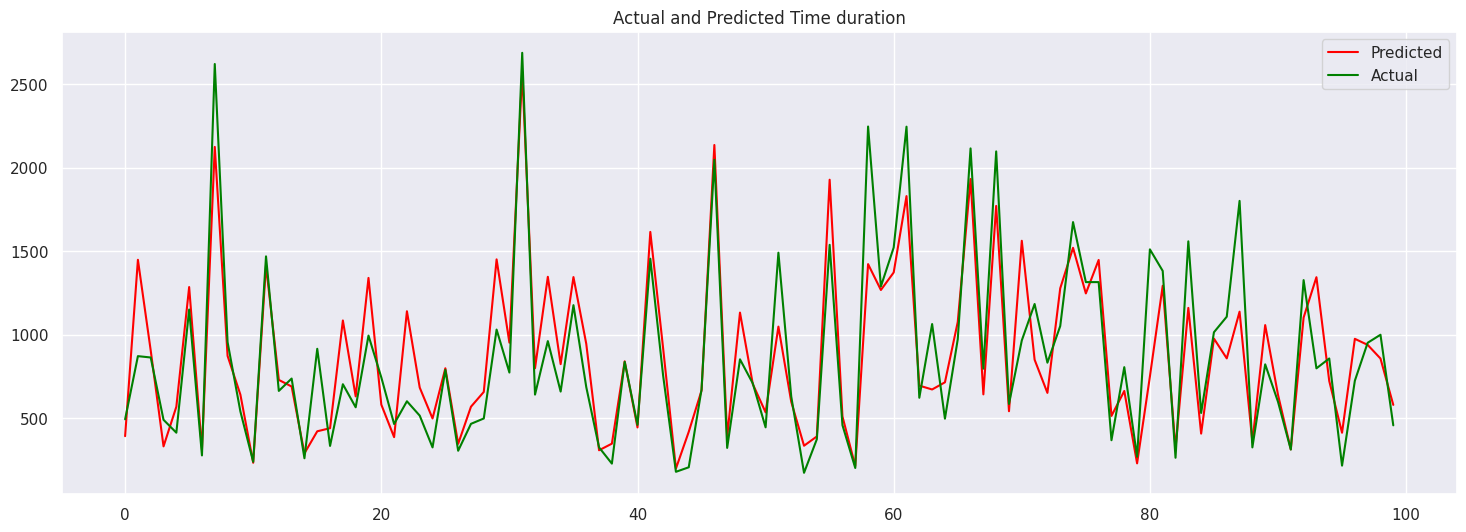

In [ ]:
evaluation_metrics(X_train, y_train,y_predict_train_Random_Forest)

Mean Squared Error: 87851.8733 Root Squared Error: 296.39816682968876
R2 Score: 0.7943494340935354 Adjusted R2 Score: 0.7943751143037575


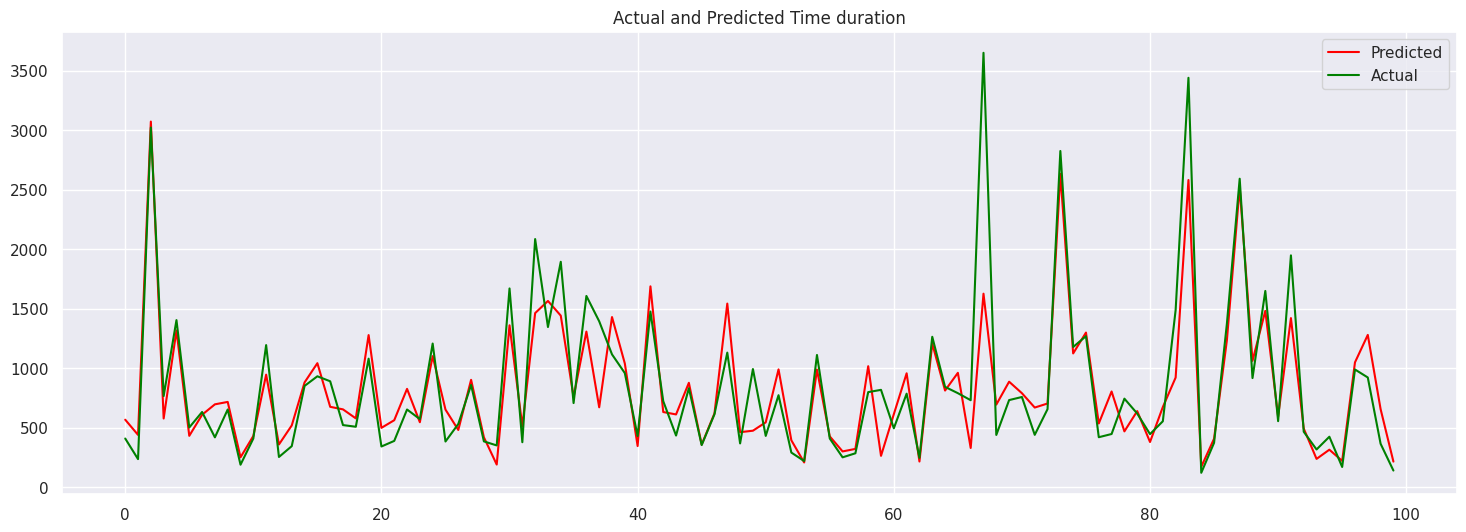

In [ ]:
evaluation_metrics(X_test, y_test,y_predict_test_Random_Forest)

### ML Model - XG Boost

In [ ]:
param_xgboost= {"total_estimators":[50],
                "max_depth": [7,9],
                "min_samples_split": [50]}


The above code defines a dictionary named param_xgboost, which is typically used to specify a grid of hyperparameter values for tuning an XGBoost (Extreme Gradient Boosting) model.

The purpose of defining this hyperparameter grid is to systematically search through these specified hyperparameter combinations to find the best set of hyperparameters that optimize the performance of the XGBoost model during training. The specific hyperparameters and their values can be adjusted to suit the requirements of your machine learning task.

In [ ]:
xgboost_model= xgb.XGBRegressor()
#Grid Search
xgboost_grid =GridSearchCV(estimator=xgboost_model, param_grid=param_xgboost, cv=5, verbose=2, scoring= "r2")
xgboost_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=  11.2s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=  10.7s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=  22.1s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=  11.4s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=  11.3s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=  14.2s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=  14.5s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=  14.7s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=  14.5s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=  13.8s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 9], 'min_samples_split': [50],
                         'total_estimators': [50]},
             scoring='r2', verbose=2)

The above code is used to perform hyperparameter tuning for an XGBoost Regressor model using grid search.

After running this code, the xgboost_grid object will store information about the best combination of hyperparameters for the XGBoost model and the best-performing model based on the cross-validation results. We can access the best hyperparameters using xgboost_grid.best_params_ and the best model using xgboost_grid.best_estimator_. These results can be used to make predictions or further analysis with the optimized model.


In [ ]:
xgboost_grid.best_score_

0.8118106371342939

The above code xgboost_grid.best_score_ is used to access and retrieve the cross-validated performance score (in terms of the scoring metric specified during the grid search) of the best-performing XGBoost Regressor model found during the grid search using the GridSearchCV object xgboost_grid.

The best score represents how well the XGBoost model with the optimized hyperparameters performed on the validation data during the grid search. The scoring metric used (e.g., R-squared, mean squared error, etc.) is determined when initializing the GridSearchCV object.

We can use this best score to assess the model's performance on the validation data during the grid search and determine how well the selected hyperparameters improve the model's performance in comparison to other combinations.

In [ ]:
xgboost_grid.best_params_

{'max_depth': 9, 'min_samples_split': 50, 'total_estimators': 50}

The above code xgboost_grid.best_params_ is used to access and retrieve the dictionary containing the best set of hyperparameters found during a grid search using the GridSearchCV object xgboost_grid for an XGBoost Regressor model.

In [ ]:
xgboost_optimal_model=xgboost_grid.best_estimator_

In [ ]:
y_pred_xg_boost_test=xgboost_optimal_model.predict(X_test)
y_pred_xg_boost_train=xgboost_optimal_model.predict(X_train)

The above code is used to make predictions on both the test data and the training data using an XGBoost Regressor model that has been previously optimized.

The above code is performing inference using an XGBoost Regressor model. The model has been previously trained and optimized with the best hyperparameters, and we are now using it to make predictions on both the test and training datasets. The predicted values can be used for further analysis and evaluation of the model's performance, including assessing how well it generalizes to unseen data (test data) and confirming its performance on the data it was trained on (training data).

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 62741.633 Root Squared Error: 250.48279943441227
R2 Score: 0.8530355421203405 Adjusted R2 Score: 0.8530473607936895


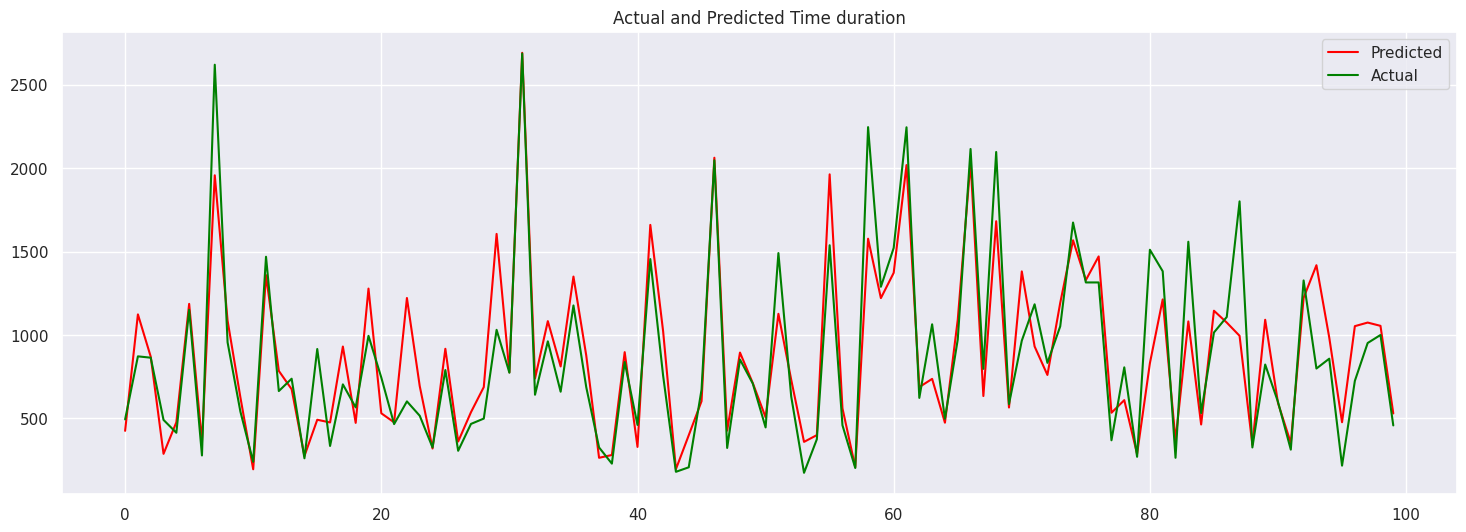

In [ ]:
evaluation_metrics(X_train, y_train,y_pred_xg_boost_train)

Mean Squared Error: 79774.64 Root Squared Error: 282.4440486627396
R2 Score: 0.813257280755096 Adjusted R2 Score: 0.8132835722296512


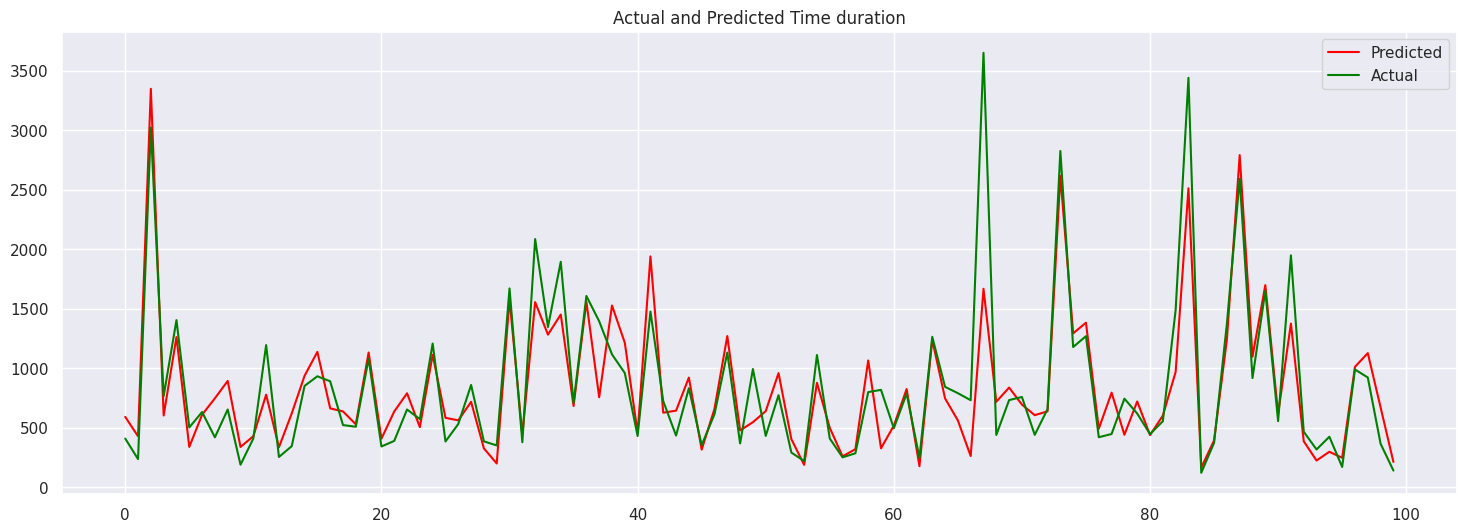

In [ ]:
evaluation_metrics(X_test, y_test,y_pred_xg_boost_test)

                     Feature  Feature Importance
9         distance_haversine               0.797
8                  time_only               0.056
7                 Pickup_day               0.039
10                 direction               0.024
5           dropoff_latitude               0.018
6               Pickup_Month               0.015
4          dropoff_longitude               0.012
2           pickup_longitude               0.012
3            pickup_latitude               0.010
11  distance_dummy_manhattan               0.007
12      store_and_fwd_flag_N               0.005
1            passenger_count               0.003
0                  vendor_id               0.003
13      store_and_fwd_flag_Y               0.000


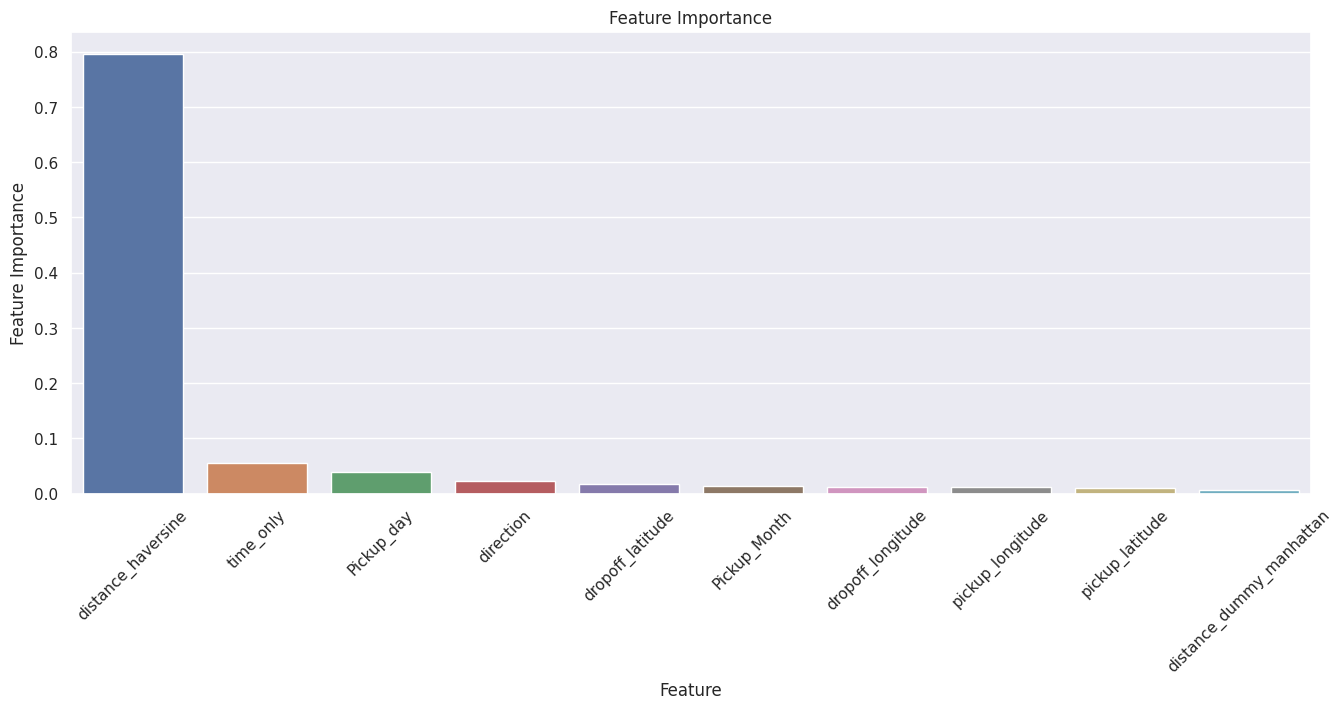

In [ ]:
feature_importance(xgboost_optimal_model)

### ML Model - Gradient Boost

In [ ]:
gradient_boost_model= GradientBoostingRegressor()
gradient_boost_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
y_preds_gradient_boost_test=gradient_boost_model.predict(X_test)
y_preds_gradient_boost_train=gradient_boost_model.predict(X_train)


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 109397.1596 Root Squared Error: 330.75241435248813
R2 Score: 0.7437507694624346 Adjusted R2 Score: 0.7437610740124366


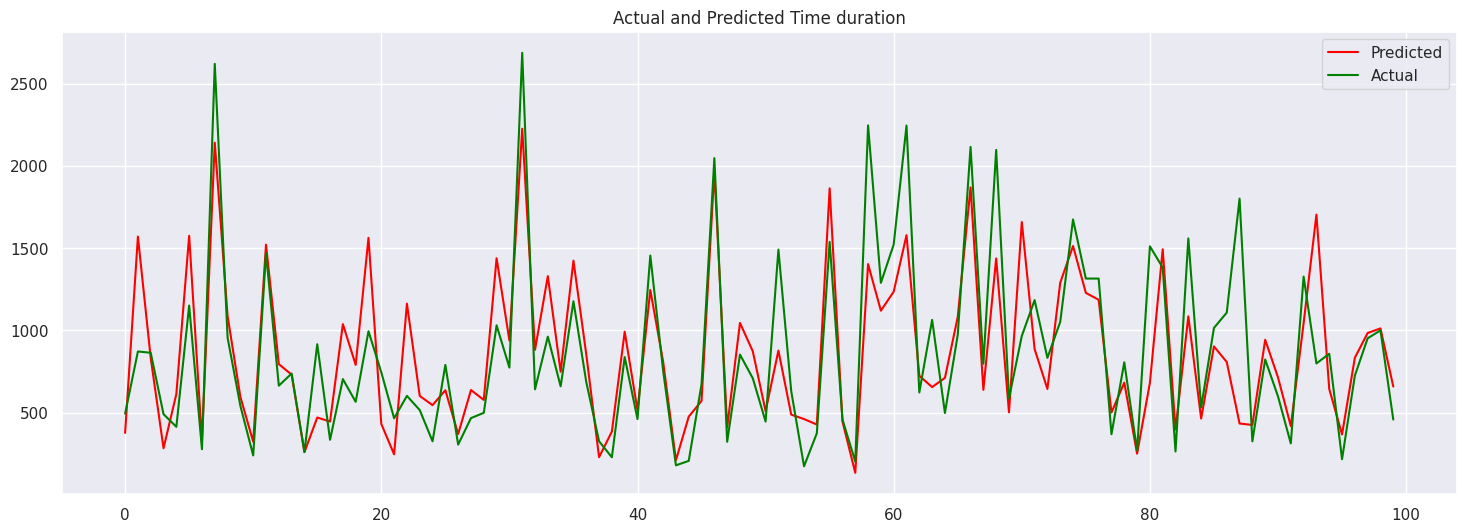

In [ ]:
evaluation_metrics(X_train, y_train,y_preds_gradient_boost_train)

Mean Squared Error: 109619.9721 Root Squared Error: 331.0890697380389
R2 Score: 0.7433929585832917 Adjusted R2 Score: 0.743416991441672


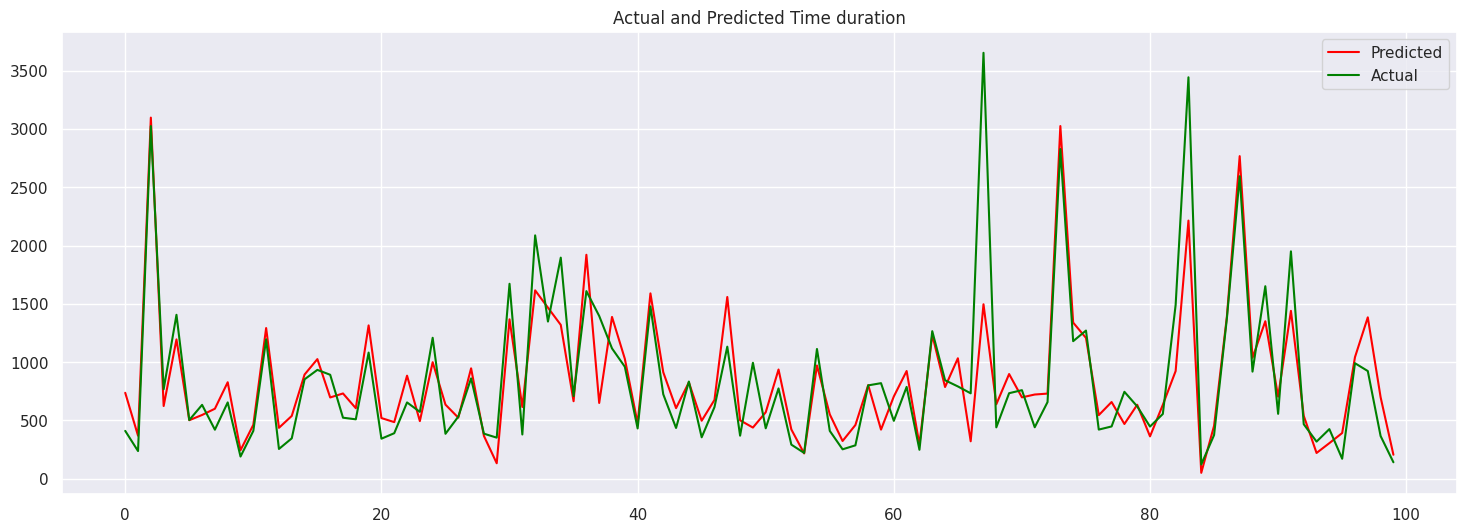

In [ ]:
evaluation_metrics(X_test, y_test,y_preds_gradient_boost_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
#list all evaluation matrics value for train data
distance_name=['MSE', 'RMSE', 'R2', 'Adjusted R2']
model_names=['Linear Regression', 'Decision Tree', 'Random Forest','Xgboost', 'Gradient Boost']
score_values_train=[[198032.6811,445.0086303657492,0.5361330922961565,0.5361405203358764],
                    [97410.4289,312.1064384148459,0.7718281942821921,0.7718388878405017],
                    [63921.1256,252.82627553322064,0.8502727190181136,0.8502844994129829],
                    [62741.633,250.48279943441227,0.8530355421203405,0.8530473607936895],
                    [109397.1596,330.75241435248813,0.7437507694624346,0.7437610740124366]]

score_values_test=[[247417.5801,497.4108765397074,0.42082549374125255,0.42083909844301504],
                  [102873.9639, 320.73971363085053, 0.7591845445294554, 0.7592090879078026],
                  [87851.8733, 296.39816682968876, 0.7943494340935354, 0.7943751143037575],
                  [79774.64, 282.4440486627396, 0.813257280755096, 0.8132835722296512],
                  [109619.9721, 331.0890697380389, 0.7433929585832917, 0.743416991441672]]


#create pandas Data Frame
df_score_train=pd.DataFrame(score_values_train, columns=distance_name, index=model_names )
df_score_test=pd.DataFrame(score_values_test, columns=distance_name, index=model_names )

The above code segment appears to be creating and organizing evaluation metric values for different machine learning models on both the training and testing data. It involves creating two Pandas DataFrames to store and present this information.

These DataFrames make it easy to view and compare the performance of different machine learning models based on various evaluation metrics for both training and testing datasets. The rows represent different models, and the columns display different evaluation metrics, allowing for a clear and organized presentation of the results.

In [ ]:
#function for comparing model
def check_model_performance(input_df):
  print(input_df)
  fig, (ax1, ax2, ax3, ax4)=plt.subplots(ncols=4, figsize=(30,8))
  x_ =['LR', 'DT', 'RF','Xgb', 'GradB']
  ax1.set_title('R2 Scores')
  ax=sns.barplot(x=x_, y='R2', data=input_df, ax=ax1)

  ax2.set_title('Adjusted R2 Score')
  ax=sns.barplot(x=x_, y='Adjusted R2', data=input_df, ax=ax2)

  ax3.set_title('MSE Scores')
  ax=sns.barplot(x=x_, y='MSE', data=input_df, ax=ax3)

  ax4.set_title('RMSE Score')
  ax=sns.barplot(x=x_, y='RMSE', data=input_df, ax=ax4)
  plt.show

The above code defines a Python function named **check_model_performance**(input_df) that is designed to compare the performance of different machine learning models based on various evaluation metrics.

The **check_model_performance** function takes an input DataFrame containing performance metrics for different machine learning models and visualizes these metrics using Seaborn bar plots in a 1x4 grid of subplots. This function provides a convenient way to compare and evaluate the performance of different models based on R2 scores, Adjusted R2 scores, MSE scores, and RMSE scores.

                         MSE    RMSE    R2  Adjusted R2
Linear Regression 198032.681 445.009 0.536        0.536
Decision Tree      97410.429 312.106 0.772        0.772
Random Forest      63921.126 252.826 0.850        0.850
Xgboost            62741.633 250.483 0.853        0.853
Gradient Boost    109397.160 330.752 0.744        0.744


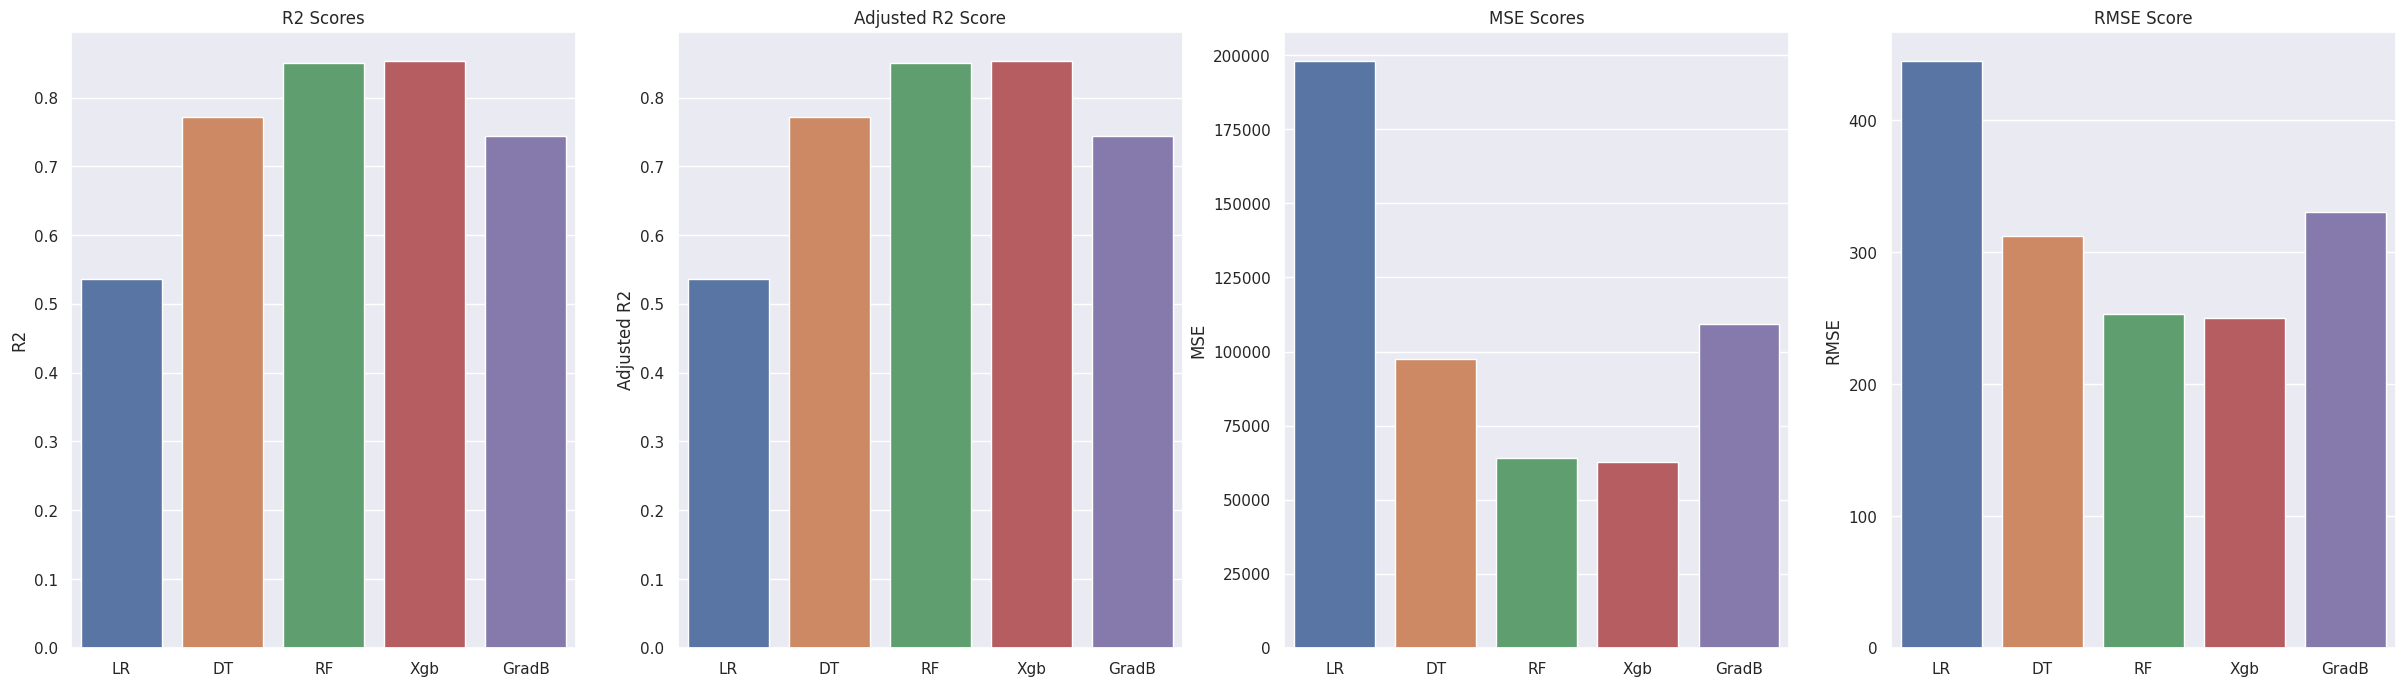

In [ ]:
check_model_performance(df_score_train)

                         MSE    RMSE    R2  Adjusted R2
Linear Regression 247417.580 497.411 0.421        0.421
Decision Tree     102873.964 320.740 0.759        0.759
Random Forest      87851.873 296.398 0.794        0.794
Xgboost            79774.640 282.444 0.813        0.813
Gradient Boost    109619.972 331.089 0.743        0.743


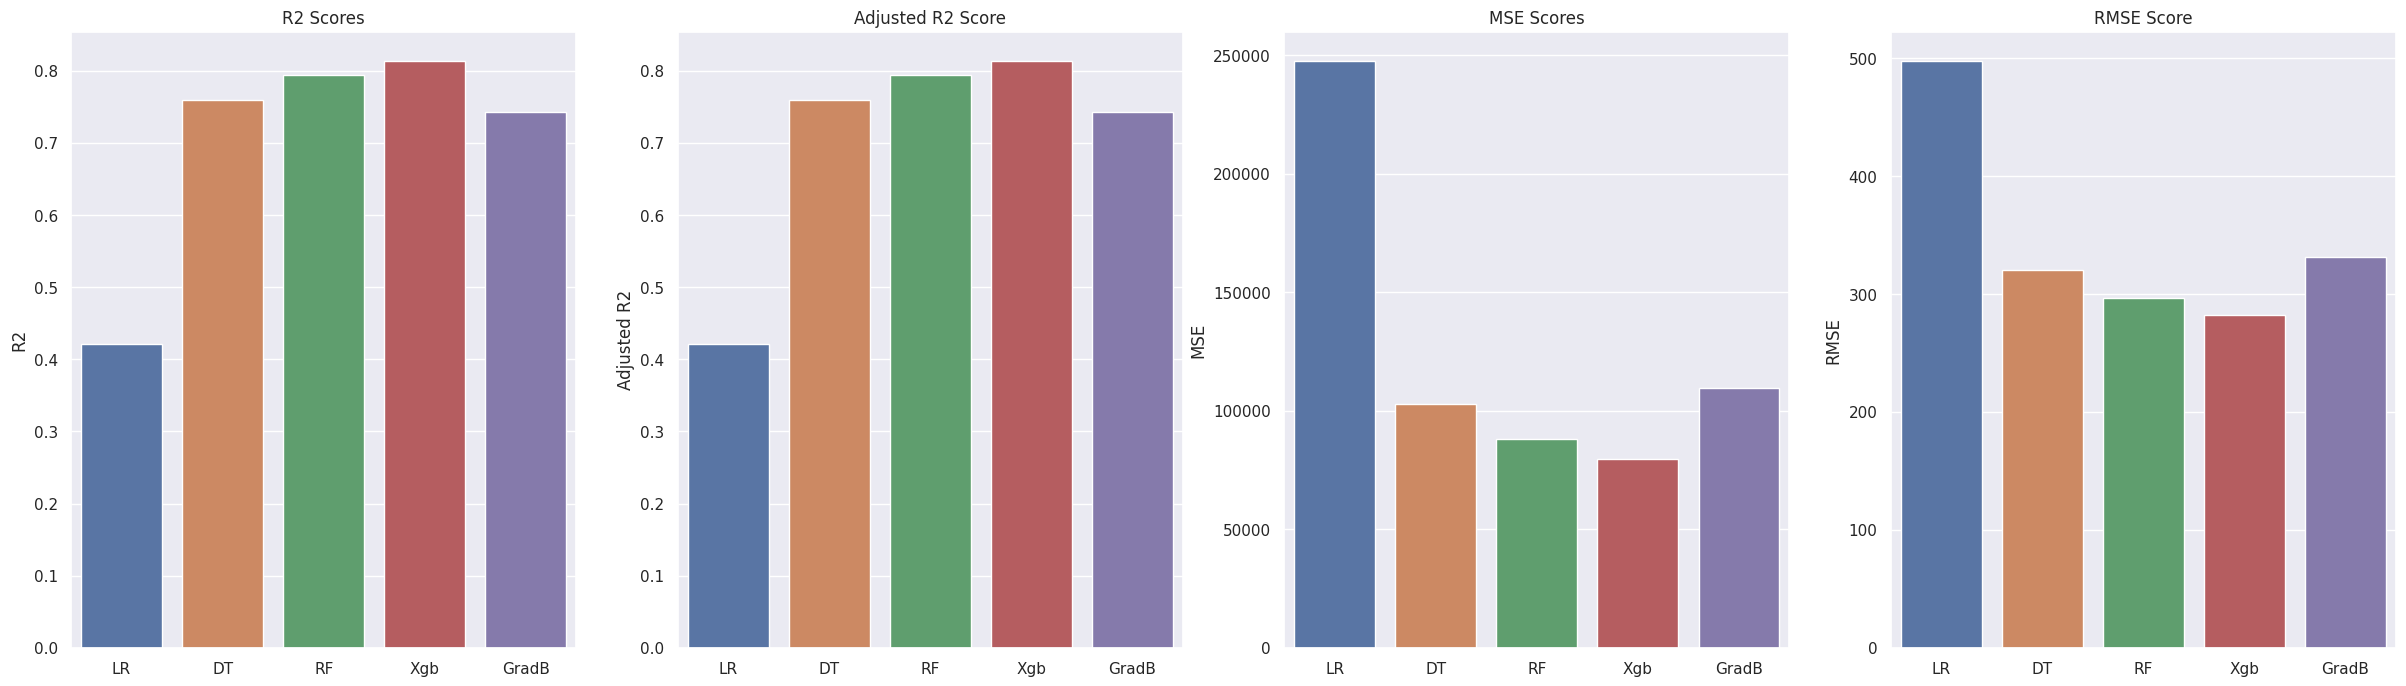

In [ ]:
check_model_performance(df_score_test)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We will choose XG Boost.

Because It have least error. It is good algorithm for this Data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The provided code defines a Python function named evaluation_metrics, which calculates and displays various evaluation metrics for a machine learning model's performance. The code prints out the computed evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) Score, and Adjusted R-squared Score.

The function also includes a visual comparison of the first 100 values of predicted and actual target values using a line plot, with predicted values in red and actual values in green. This function provides a summary of how well a model's predictions align with the actual data.

Additionally, the code sets up a hyperparameter grid for a Random Forest Regressor, defines a grid search for hyperparameter tuning, and fits the model to training data. The best hyperparameters and model performance scores can be accessed through the grid search object.

The code organizes and displays performance metrics for different machine learning models, both on training and testing datasets, in Pandas DataFrames. It also defines a function, check_model_performance, to visualize and compare model performance using Seaborn bar plots.

Finally, it selects XG Boost as the preferred algorithm due to its lower error, making it a suitable choice for the given data.

# **Conclusion**

In summary, the conclusions drawn from the provided paragraphs and charts are as follows:

**Data Overview:**

> The dataset contains approximately 1.5 million records.

> There are no NaN or duplicate records in the dataset, eliminating the need for data imputation.


**Trip Duration Analysis:**
> Most trips have durations between 0.5 minutes and 2 hours.

>The dataset has extreme values, with a minimum trip duration of 1 second and a maximum of 3,526,282 seconds, indicating the presence of outliers.


>Outliers with very short or very long trip durations need further attention and possible removal.

**Passenger Count Analysis:**

> The passenger count ranges from 0 to 9.

>Trips with 0 passengers are considered outliers and should be removed.

> The assumption is that taxis cannot carry more than 6 passengers.

> Trips with passenger counts of 2 and 4 tend to have the highest mean trip durations.

**Feature Engineering:**

> Suggested extracting information from the 'pickup_datetime' field, such as the hour of the day, day of the week, and day of the month, to account for traffic patterns and seasonality.

**Geospatial Analysis:**

> Emphasizes the value in 'latitude' and 'longitude' variables for clustering locations into neighborhoods and calculating distances and directions between coordinates.

**Column Removal:**

> Suggested removing columns 'Pickup_Year', 'id', 'pickup_datetime', and 'dropoff_datetime' due to redundancy or lack of relevance.

**Outlier Observations:**

> Identified several outliers, including passenger count of 0, very short trips, very long trips, and trips with more than 6 passengers.

> The plan is to further analyze and potentially remove these outliers.

**Vendor Analysis:**

> Vendor 2 has the highest number of trips.

**Store and Forward Flag Analysis:**

> Vendor 2 has no recorded trips with the 'Y' flag, suggesting they may not store and forward trips.

**Monthly Analysis:**

> The highest number of trips occurs in the 3rd month, with relatively consistent trip counts across other months.

**Day of the Week Analysis:**

> Trip counts are lower on Sundays and Mondays, while they are higher on Fridays and Saturdays, indicating differences related to weekdays and weekends.

**Time of Day Analysis:**

> Trip counts increase significantly in the evening (6 pm to 10 pm) and decrease after midnight (1 am to 6 am).

> The mean trip duration follows a distinct pattern throughout the day, peaking between 2 PM and 4 PM.

**Distance Category Analysis:**

> Most trips are not above 30 kilometers, with a notable number of very short trips (e.g., 74,184 trips for half a kilometer).

**Outlier Removal:**

> Suggests removing entries with passenger counts outside the range of 1 to 6 and trips below 1 minute or above 2 hours.

**Vendor Comparison:**

> Vendor 2 has more trips compared to Vendor 1.



**Store and Forward Flag Analysis:**

> Trips with the "Store and Fwd No" flag show the highest mean trip durations.

**Monthly Trends:**

> May and June stand out with the highest mean trip durations, suggesting potential factors driving longer trips during these months.



**Benefits of the insights:**

> Vendor performance assessment and resource allocation.

> Improving data recording and service quality.

> Resource planning for single-passenger trips.

> Scheduling and resource allocation based on weekdays and weekends.

> Preparation for seasonality and monthly demand fluctuations.

> Efficient management during peak hours.

**Negative Points or Considerations:**

> Investigate Vendor 1's performance and fairness.

> Address unrecorded trips issue for data accuracy.

> Understand the reasons behind single-passenger trips.

> Explore the specific reasons behind monthly trends.

> Investigate time of day trends and their drivers.

**Data Splitting:**

> 70% training data and 30% testing data to balance learning and evaluation.

**Primary Independent Variable:**

> Distance has the most significant impact on trip duration, followed by time and, to a lesser extent, the day.

**Algorithm Selection:**

> XG Boost is chosen as it has the least error, making it a suitable algorithm for the dataset.


These conclusions provide a foundation for further data preprocessing, feature engineering, and modeling to build a predictive model for trip duration. The insights gained from the dataset help in making informed decisions and optimizing the taxi service.